# Step 1: Data Preparation

Since data preparation is a crucial step in the data science and machine learning workflow, we start with having a look at our data, its structure and flaws. Our primary goals in this phase include, however we might not follow the order listed below:

**1. Cleaning Data:**
    - Removing or correcting errors and inconsistencies in the data.

**2. Transforming Data:**
    - Standardizing or normalizing numerical features to ensure consistency and comparability.
    - Encoding categorical variables into numerical representations that can be used by machine learning algorithms.
    - Creating new features or aggregating existing ones to extract more meaningful information.
    
**3. Handling Missing Values:**
    - Choosing appropriate strategies for handling missing data, such as mean imputation, median imputation, or more advanced methods like regression imputation.
    
**4. Dealing with Outliers (We might decide to postpone this step to a later point.):**
    - Identifying and addressing outliers that can significantly impact the analysis or model performance.
    
**5. Feature Engineering ((We might decide to postpone this step to a later point.)**:
    - Selecting, transforming or creating new features to enhance the performance of our ML models.
    
**6. Data Formatting:**
    - Ensuring that the data is in the right format for the chosen analysis and modeling techniques.

In the next steps, we import the necessary packages and load our datasets. We first start with the charging sessiong dataset.

In [220]:
# import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [113]:
# import dataset
dfCharging = pd.read_csv("Data/charging_sessions.csv")
dfCharging.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [114]:
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [115]:
#remove the first "Unnamed" Column
dfCharging = dfCharging.drop('Unnamed: 0', axis=1)
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                66450 non-null  object 
 1   connectionTime    66450 non-null  object 
 2   disconnectTime    66450 non-null  object 
 3   doneChargingTime  62362 non-null  object 
 4   kWhDelivered      66450 non-null  float64
 5   sessionID         66450 non-null  object 
 6   siteID            66450 non-null  int64  
 7   spaceID           66450 non-null  object 
 8   stationID         66450 non-null  object 
 9   timezone          66450 non-null  object 
 10  userID            49187 non-null  float64
 11  userInputs        49187 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 6.1+ MB


In [116]:
# test if there a duplicate rows
len(dfCharging)-len(dfCharging.drop_duplicates())

1413

In [117]:
# remove duplicate rows
dfCharging = dfCharging.drop_duplicates()

In [118]:
# Check for missing values
print(dfCharging.isnull().sum())

id                      0
connectionTime          0
disconnectTime          0
doneChargingTime     4087
kWhDelivered            0
sessionID               0
siteID                  0
spaceID                 0
stationID               0
timezone                0
userID              17215
userInputs          17215
dtype: int64


We note that the columns , 'userID', 'userInputs' and 'doneChargingTime' have a considerable number of missing values.

First we check if the 'userID' matches the 'userInputs'

In [119]:
# Check whether the lines with missing 'userInputs' also have missing 'userID'
missing_userInputs = dfCharging['userInputs'].isnull()
missing_userID = dfCharging['userID'].isnull()

# Check that the missing values match
matching_missing = dfCharging[missing_userInputs & missing_userID]

# Output the number of matching lines
print(f'Number of lines with missing "userID" and "userIputs": {len(matching_missing)}')

# Calculate percentage of match
total_missing_userInputs = len(dfCharging[missing_userInputs])
if total_missing_userInputs > 0:
    matching_percentage = (len(matching_missing) / total_missing_userInputs) * 100
    print(f'Percentage of compliance: {matching_percentage:.2f}%')


Number of lines with missing "userID" and "userIputs": 17215
Percentage of compliance: 100.00%


In [120]:
dfCharging['userID'].head()

0     194.0
1    4275.0
2     344.0
3    1117.0
4     334.0
Name: userID, dtype: float64

In [121]:
dfCharging['userInputs'].head()

0    [{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...
1    [{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...
2    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
3    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
4    [{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...
Name: userInputs, dtype: object

In [122]:
for i in range(5):
    print(dfCharging['userInputs'].iloc[i])
    print("\n")

[{'WhPerMile': 250, 'kWhRequested': 25.0, 'milesRequested': 100, 'minutesAvailable': 463, 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT', 'userID': 194}]


[{'WhPerMile': 280, 'kWhRequested': 70.0, 'milesRequested': 250, 'minutesAvailable': 595, 'modifiedAt': 'Thu, 02 Jan 2020 13:37:11 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 23:31:50 GMT', 'userID': 4275}]


[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 60, 'modifiedAt': 'Thu, 02 Jan 2020 13:57:17 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 14:56:35 GMT', 'userID': 344}]


[{'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'minutesAvailable': 65, 'modifiedAt': 'Thu, 02 Jan 2020 14:00:03 GMT', 'paymentRequired': True, 'requestedDeparture': 'Thu, 02 Jan 2020 15:04:58 GMT', 'userID': 1117}, {'WhPerMile': 400, 'kWhRequested': 8.0, 'milesRequested': 20, 'min

But another important point could be to check out if the amount of missing data in these columns is significantly high

In [123]:
#Calculate total amount of observations recorded
total_observations_userID = len(dfCharging["userID"])
total_observations_userInputs = len(dfCharging["userInputs"])

#Calculate the amount of missing data
total_missing_userID = dfCharging["userID"].isnull().sum()
total_missing_userInputs = dfCharging["userInputs"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_userID = 100 * total_missing_userID / total_observations_userID
percentage_missing_userInputs = 100 * total_missing_userInputs / total_observations_userInputs

#Print the results
print("The percentage of missing data in userID:", percentage_missing_userID)
print("The percentage of missing data in userInputs:", percentage_missing_userInputs)



The percentage of missing data in userID: 26.469548103387304
The percentage of missing data in userInputs: 26.469548103387304


### Dealing with Missing Data

From the previous operations we see that almost a quarter of our data in these columns are missing. Therefore, we now have to decide how to deal with the missing data

- Do we remove the rows with the missing data?

- Do we keep the rows but ignore that these values are missing?

- Do we consider ways to impute the missing values?

In [124]:
print(dfCharging[['connectionTime', 'disconnectTime', 'doneChargingTime']].head())

              connectionTime             disconnectTime  \
0  2020-01-02 13:08:54+00:00  2020-01-02 19:11:15+00:00   
1  2020-01-02 13:36:50+00:00  2020-01-02 22:38:21+00:00   
2  2020-01-02 13:56:35+00:00  2020-01-03 00:39:22+00:00   
3  2020-01-02 13:59:58+00:00  2020-01-02 16:38:39+00:00   
4  2020-01-02 14:00:01+00:00  2020-01-02 22:08:40+00:00   

            doneChargingTime  
0  2020-01-02 17:31:35+00:00  
1  2020-01-02 20:18:05+00:00  
2  2020-01-02 16:35:06+00:00  
3  2020-01-02 15:18:45+00:00  
4  2020-01-02 18:17:30+00:00  


In [125]:
#Calculate total amount of observations recorded
total_observations_doneChargingTime = len(dfCharging["doneChargingTime"])

#Calculate the amount of missing data
total_missing_doneChargingTime = dfCharging["doneChargingTime"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_doneChargingTime = 100 * total_missing_doneChargingTime / total_observations_doneChargingTime

#Print the results
print("The percentage of missing data in doneChargingTime:", percentage_missing_doneChargingTime)

The percentage of missing data in doneChargingTime: 6.284115195965374


In [126]:
# Convert to datetime
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'])
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'])

# Calculate the charging duration
dfCharging['calculatedDuration'] = dfCharging['doneChargingTime'] - dfCharging['connectionTime']

# Convert the charging duration to hours
dfCharging['calculatedDurationHours'] = dfCharging['calculatedDuration'].dt.total_seconds() / 3600

# Calculate the median and standard deviation of charging duration
# These statistics provide insights into the central tendency and dispersion of charging durations across all sessions
median_duration_hours = dfCharging['calculatedDurationHours'].median()
std_duration_hours = dfCharging['calculatedDurationHours'].std()

# Print the calculated statistics
print(f'Median of Charging Duration: {median_duration_hours:.2f} hours')
print(f'Standard Deviation of Charging Duration: {std_duration_hours:.2f} hours')

Median of Charging Duration: 2.76 hours
Standard Deviation of Charging Duration: 3.06 hours


Correlation between charging duration and kWh delivered in complete cases: 0.5322274987647438


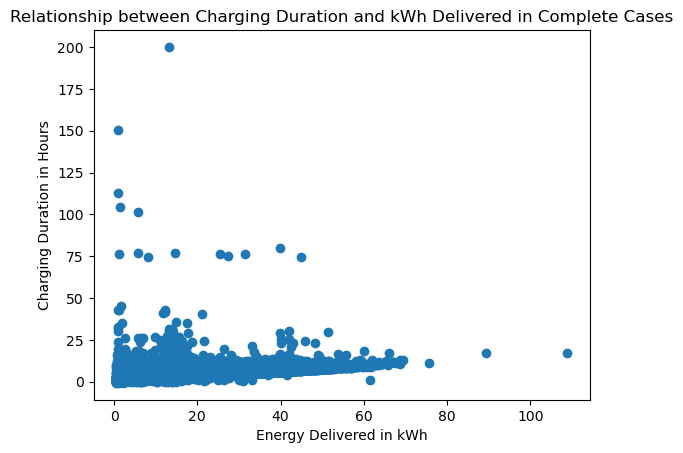

In [127]:
# Calculate charging duration in hours
dfCharging['chargingDuration'] = (dfCharging['doneChargingTime'] - dfCharging['connectionTime']).dt.total_seconds() / 3600

# Create a subset with no missing values for analysis
subset = dfCharging.dropna(subset=['chargingDuration', 'kWhDelivered'])

# Calculate correlation on the subset
correlation = subset['chargingDuration'].corr(subset['kWhDelivered'])
print(f'Correlation between charging duration and kWh delivered in complete cases: {correlation}')

# Scatter plot on the subset
plt.scatter(subset['kWhDelivered'], subset['chargingDuration'])
plt.xlabel('Energy Delivered in kWh')
plt.ylabel('Charging Duration in Hours')
plt.title('Relationship between Charging Duration and kWh Delivered in Complete Cases')
plt.show()

### Decision Point 1:
Another column with a lot of missing data is the doneChargingTime column.

But doneChargingTime could also be calculated using two other columns with zero missing values, for example by:

*doneChargingTime = disconnectTime - connectionTime*

But from line 11 we see that this is not the case, since a EV can still be connected to the system even though it has finished charging. So we should decide what to do:
 
- Do we delete all columns in which there is nothing in doneChargingTime?

- Do we calculate the median of how long it always took from connectionTime to doneChargingTime and then replace the median in the missing columns?

'''
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'])
dfCharging['disconnectTime'] = pd.to_datetime(dfCharging['disconnectTime'])
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'])

dfCharging['calculatedDuration'] = dfCharging['doneChargingTime'] - dfCharging['connectionTime']

median_duration = dfCharging['calculatedDuration'].median()

dfCharging.loc[dfCharging['doneChargingTime'].isnull(), 'doneChargingTime'] = dfCharging['connectionTime'] + median_duration
'''

In [128]:
#Load the weather data from burbank airport
dfWeather = pd.read_csv("Data/weather_burbank_airport.csv")
dfWeather.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [129]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [130]:
# test if there a duplicate rows
len(dfWeather)-len(dfWeather.drop_duplicates())

0

No duplicates available

In [131]:
# Check for missing values
print(dfWeather.isnull().sum())

city                        0
timestamp                   0
temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  86
precipitation               0
felt_temperature           26
dtype: int64


The columns , ‘temperature’, ‘cloud_cover’, 'cloud_cover_description', 'pressure', 'windspeed' and ‘felt_temperature’ have a number of missing values.

First we check if 'cloud_cover' and 'cloud_cover_description' columns match the userInputs

In [132]:
# Check whether the lines with missing 'cloud_cover' also have missing 'cloud_cover_description'
missing_userInputs = dfWeather['cloud_cover'].isnull()
missing_userID = dfWeather['cloud_cover_description'].isnull()

# Check that the missing values match
matching_missing = dfWeather[missing_userInputs & missing_userID]

# Output the number of matching lines
print(f'Number of lines with missing "cloud_cover" and "cloud_cover_description": {len(matching_missing)}')

# Calculate percentage of match
total_missing_userInputs = len(dfWeather[missing_userInputs])
if total_missing_userInputs > 0:
    matching_percentage = (len(matching_missing) / total_missing_userInputs) * 100
    print(f'Percentage of compliance: {matching_percentage:.2f}%')

Number of lines with missing "cloud_cover" and "cloud_cover_description": 20
Percentage of compliance: 100.00%


At this point we could again check if the amount of missing data is significantly high

In [133]:
#Calculate total amount of observations recorded
total_observations_cloud_cover = len(dfWeather["cloud_cover"])
total_observations_cloud_cover_description = len(dfWeather["cloud_cover_description"])

#Calculate the amount of missing data
total_missing_cloud_cover = dfWeather["cloud_cover"].isnull().sum()
total_missing_cloud_cover_description = dfWeather["cloud_cover_description"].isnull().sum()

#Calculate the percentage of missing values
percentage_missing_cloud_cover = 100 * total_missing_cloud_cover / total_observations_cloud_cover
percentage_missing_cloud_cover_description = 100 * total_missing_cloud_cover_description / total_observations_cloud_cover_description

#Print the results
print("The percentage of missing data in cloud_cover:", percentage_missing_cloud_cover)
print("The percentage of missing data in cloud_cover_description:", percentage_missing_cloud_cover_description)



The percentage of missing data in cloud_cover: 0.0683900971139379
The percentage of missing data in cloud_cover_description: 0.0683900971139379


We see that only 0,068% of our data is missing. We now could check the other columns with missing values to see how much of our data is missing there. We build a a for loop to do this faster. 

In [134]:
# List of columns to check for missing values
columns_to_check = ["temperature", "pressure", "windspeed", "felt_temperature"] 

for column in columns_to_check:
    total_observations = len(dfWeather[column])
    total_missing = dfWeather[column].isnull().sum()
    percentage_missing = 100 * total_missing / total_observations
    print(f"Percentage of missing values in {column}: {percentage_missing:.2f}%")


Percentage of missing values in temperature: 0.09%
Percentage of missing values in pressure: 0.03%
Percentage of missing values in windspeed: 0.29%
Percentage of missing values in felt_temperature: 0.09%


### Decision Point 2:

We now have to decide what to do with the missing data

- Do we remove the rows with the missing data?

- Do we keep the rows but ignore that these values are missing?

- Do we consider ways to impute the missing values?

For **weather data** we decide apply mean imputation for the following columns:

- temperature
- cloud cover
- pressure
- windspeed
- felt temperature

In [135]:
# Sort the DataFrame by timestamp
dfWeather.sort_values(by='timestamp', inplace=True)

# Function to impute missing values using the mean of neighboring values
def impute_missing_values(column, window_size=5):
    # Calculate the mean using a rolling window
    # We have to use a window for the cases where some neighboring values are also missing.
    return column.fillna(column.rolling(window=window_size, min_periods=1).mean())

# Apply the imputation function to the specified columns
columns_to_impute = ['temperature', 'cloud_cover', 'windspeed', 'pressure',"felt_temperature"]

for column in columns_to_impute:
    dfWeather[column] = impute_missing_values(dfWeather[column])

# Verify the changes
print(dfWeather.isnull().sum())



city                        0
timestamp                   0
temperature                 0
cloud_cover                 0
cloud_cover_description    20
pressure                    0
windspeed                   0
precipitation               0
felt_temperature            0
dtype: int64


In [136]:
def fill_missing_cloud_cover_description(dfWeather):
    dfWeather = dfWeather.sort_values(by='timestamp')  # Actually not needed because of the previous function

    for index, row in dfWeather.iterrows():
        if pd.isnull(row['cloud_cover_description']):
            # Round the 'cloud_cover' value
            rounded_cloud_cover = round(row['cloud_cover'])

            # Try to find a match with the rounded 'cloud_cover'
            matching_rows = dfWeather[(round(dfWeather['cloud_cover']) == rounded_cloud_cover) & (~pd.isnull(dfWeather['cloud_cover_description']))]

            if not matching_rows.empty:
                matching_description = matching_rows['cloud_cover_description'].values[0]
                dfWeather.at[index, 'cloud_cover_description'] = matching_description
            else:
                # If no match is found, try to find a match for 'rounded_cloud_cover + 1'
                next_matching_rows = dfWeather[(round(dfWeather['cloud_cover']) == rounded_cloud_cover + 1) & (~pd.isnull(dfWeather['cloud_cover_description']))]

                if not next_matching_rows.empty:
                    next_matching_description = next_matching_rows['cloud_cover_description'].values[0]
                    dfWeather.at[index, 'cloud_cover_description'] = next_matching_description

    return dfWeather

dfWeather = fill_missing_cloud_cover_description(dfWeather)

# Verify the changes
print(dfWeather.isnull().sum())


city                       0
timestamp                  0
temperature                0
cloud_cover                0
cloud_cover_description    0
pressure                   0
windspeed                  0
precipitation              0
felt_temperature           0
dtype: int64


In [137]:
# Convert the time columns to datetime objects
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'])
dfCharging['disconnectTime'] = pd.to_datetime(dfCharging['disconnectTime'])
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'])

# Compute the time differences
dfCharging['disconnectDuration'] = dfCharging['disconnectTime'] - dfCharging['connectionTime']
dfCharging['doneChargingDuration'] = dfCharging['doneChargingTime'] - dfCharging['connectionTime']
dfCharging['doneToDisconnectDuration'] = dfCharging['disconnectTime'] - dfCharging['doneChargingTime']





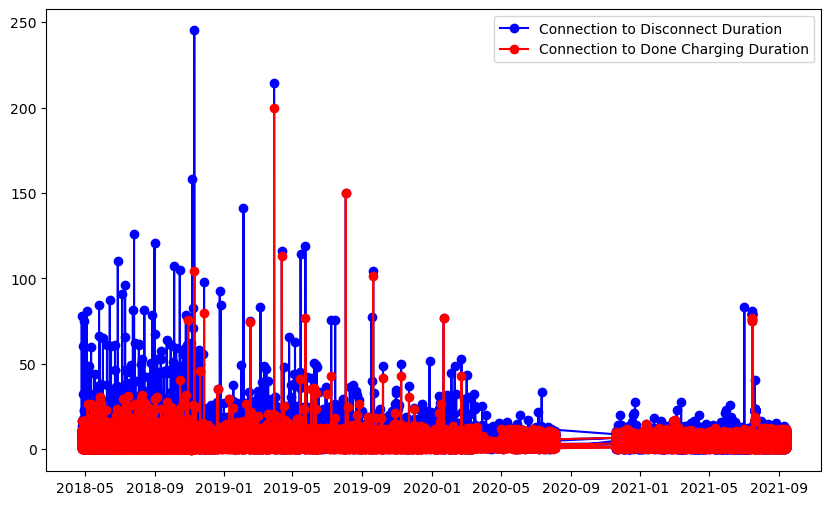

In [138]:
from matplotlib import pyplot as plt

# Plot the duration
plt.figure(figsize=(10, 6))

plt.plot(dfCharging['connectionTime'], dfCharging['disconnectDuration'].dt.total_seconds() / 3600,
         marker='o', linestyle='-', color='b', label='Connection to Disconnect Duration')
plt.plot(dfCharging['connectionTime'], dfCharging['doneChargingDuration'].dt.total_seconds() / 3600,
         marker='o', linestyle='-', color='r', label='Connection to Done Charging Duration')

plt.legend()

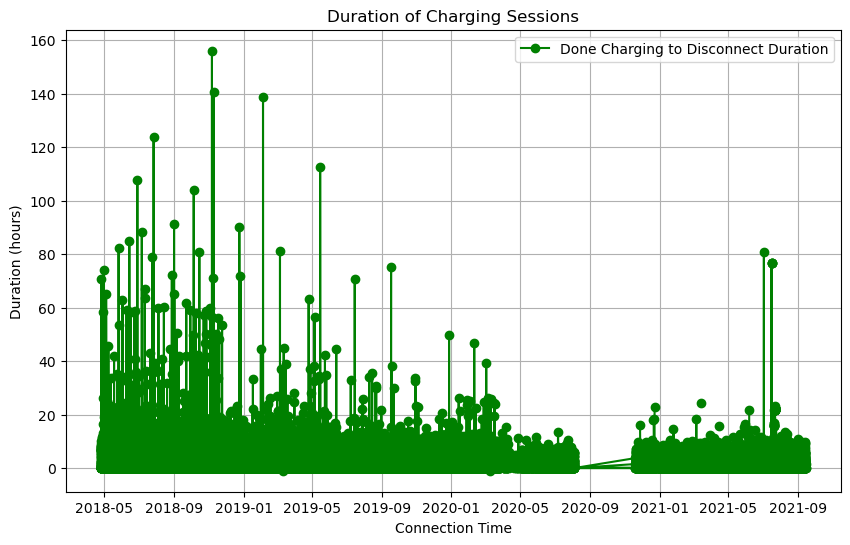

In [139]:
plt.figure(figsize=(10, 6))
plt.title('Duration of Charging Sessions')
plt.xlabel('Connection Time')
plt.ylabel('Duration (hours)')
plt.plot(dfCharging['connectionTime'], dfCharging['doneToDisconnectDuration'].dt.total_seconds() / 3600,
         marker='o', linestyle='-', color='g', label='Done Charging to Disconnect Duration')

plt.legend()
plt.grid(True)
plt.show()

In [140]:
dfCharging["siteID"].unique()

array([1, 2], dtype=int64)

## Analysis of missing values of 'doneChargingTime'

In [141]:
import json
import math

In [142]:
#methods for data transformation

#transform 'userInputs' object to dictionary data type
def userInputStringToDictionary(entry):
    
    s = entry.replace("\'", "\"").replace("True", "1").replace("False","0")
    return json.loads(s)[0]

#cast of time variables
def transformDictionaryForTimeComparison(entry):
    
    entry['minutesAvailable'] = int(entry['minutesAvailable'])
    entry['modifiedAt'] = pd.to_datetime(entry['modifiedAt'], utc = True)
    entry['requestedDeparture'] = pd.to_datetime(entry['requestedDeparture'], utc = True)
    return entry

#checks if 'minutesAvailable' == 'requestedDeparture' - 'connectionTime' and sets true or false for new dictionary value 
#'minutesAvailableValid'
def calculateTimeDelta(entry):
    
    deltaUp = math.ceil((entry['requestedDeparture']-entry['connectionTime']).total_seconds() / 60)
    deltaDown = deltaUp - 1
    result = (deltaUp == entry['userInputs']['minutesAvailable']) or (deltaDown == entry['userInputs']['minutesAvailable'])
    entry['userInputs']['minutesAvailableValid'] = result
    return entry['userInputs']

#return 'requestedDeparture' value from dictionary 'userInputs'
def returnRequestedDeparture(entry):
    
    return entry['requestedDeparture']

#return 'kWhRequested' value from dictionary 'userInputs'
def returnKwhRequested(entry):
    
    return entry['kWhRequested']

In [143]:
dfFull = dfCharging.copy()

#Transform dateTime columns
dfFull['connectionTime'] = pd.to_datetime(dfFull['connectionTime'], utc = True)
dfFull['disconnectTime'] = pd.to_datetime(dfFull['disconnectTime'], utc = True)
dfFull['doneChargingTime'] = pd.to_datetime(dfFull['doneChargingTime'], utc = True)

#Transform 'userInputs' into dictionary type
dfFull['userInputs'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(userInputStringToDictionary)

#Transform datetime values in dictionary to dateTime
dfFull['userInputs'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(transformDictionaryForTimeComparison)

#Create Column for some 'userInput' (dictionary) values
dfFull['requestedDeparture'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(returnRequestedDeparture)
dfFull['kWhRequested'] = dfFull[~dfFull['userInputs'].isna()]['userInputs'].apply(returnKwhRequested)

#Check if 'minutesAvailable' equals 'requestedDeparture' - 'connectionTime'
dfFull['userInputs'] = dfFull[~dfFull['userInputs'].isna()].apply(lambda row: calculateTimeDelta(row), axis=1)

In [144]:
mask = dfFull.dropna(subset=['userInputs'])['userInputs'].apply(lambda x: x.get('minutesAvailableValid', None) is not None and x['minutesAvailableValid'] == True)

dfMask = dfFull.dropna(subset=['userInputs'])[mask]

print('Nr of samples with userInputs: ' + str(dfFull.dropna(subset=['userInputs']).shape[0]))
print('Nr of samples with userInputs where minutesAvailable equals requestedDeparture - connectionTime:: ' + str(dfMask.shape[0]))


Nr of samples with userInputs: 47822
Nr of samples with userInputs where minutesAvailable equals requestedDeparture - connectionTime:: 47822


In [145]:
#create dataset with 'doneChargingTime'
dfWithDoneChargingTime = dfFull.dropna(subset=['doneChargingTime']).copy()
nrSamplesWithDoneChargingTime = dfWithDoneChargingTime.shape[0]

#create dataset with 'doneChargingTime' AND 'userInput'
dfWithDoneChargingTimeAndUserInputs = dfWithDoneChargingTime.dropna(subset=['userInputs']).copy()

#create dataset without 'doneChargingTime'
dfNaNdoneChargingTime = dfFull[dfFull['doneChargingTime'].isnull()].copy()
nrSamplesNanDoneChargingTime = dfNaNdoneChargingTime.shape[0]

#create dataset without 'doneChargingTime' AND with 'userInput'
dfNoDoneTimeWithUserInputs = dfNaNdoneChargingTime.dropna(subset=['userInputs']).copy()
nrSamplesNoDoneTimeWithUserInputs = dfNoDoneTimeWithUserInputs.shape[0]


In [146]:
#Get samples without 'doneChargingTime', with 'userInput' and fullfilled kWh request
dfDeliveredKwh = dfNoDoneTimeWithUserInputs[dfNoDoneTimeWithUserInputs['kWhDelivered'] >= dfNoDoneTimeWithUserInputs['kWhRequested']]

print('Nr of samples where without doneChargingTime, with userInput and fullfilled kWh request: ' + str(dfDeliveredKwh.shape[0]))

#Nr of samples where the car wasnt charged to the requested amount -> 'doneChargingTime' == 'disconnectTime'?
nrNotDeliveredKwh = dfNoDoneTimeWithUserInputs[dfNoDoneTimeWithUserInputs['kWhDelivered'] < dfNoDoneTimeWithUserInputs['kWhRequested']].shape[0]
print('Nr of samples without doneChargingTime, with userInput and not fullfilled kWh request: ' + str(nrNotDeliveredKwh))

print(str(nrSamplesNoDoneTimeWithUserInputs/nrSamplesNanDoneChargingTime) + "% of the samples where doneChargingTime is missing have userInputs")

print(str(nrNotDeliveredKwh/nrSamplesNanDoneChargingTime) + '% of the samples where doneChargingTime is missing have not fullfiled the kWh request')


Nr of samples where without doneChargingTime, with userInput and fullfilled kWh request: 296
Nr of samples without doneChargingTime, with userInput and not fullfilled kWh request: 2882
0.7775874724736971% of the samples where doneChargingTime is missing have userInputs
0.705162711034989% of the samples where doneChargingTime is missing have not fullfiled the kWh request


If it means that when the kWh request was not fullfiled, the doneChargingTime is just the disconnectTime, then we could set 71% of the missing doneChargingTime values.

So lets have a look at the samples with doneChargingTime and not fullfiled kWh Request. If it is true that doneChargingTime == disconnectTime, then we can solve 71% of the missing values.

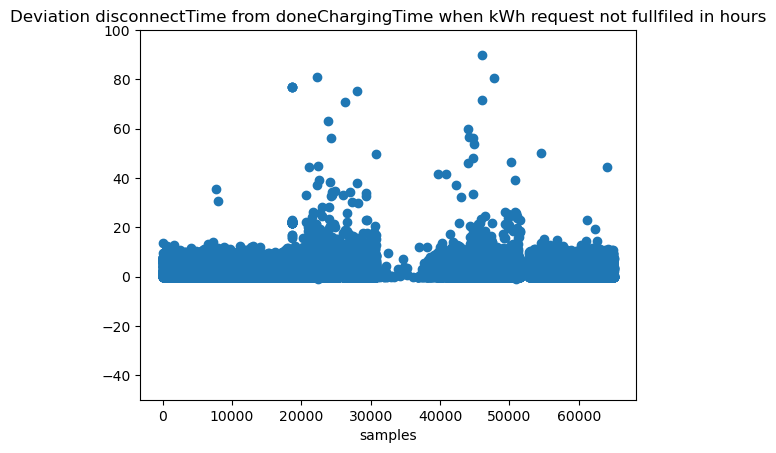

In [147]:
def calcDiffDisconnectAndDoneCharging(entry):
    
    return (entry['disconnectTime']-entry['doneChargingTime']).total_seconds()/60/60

dfNotDeliveredKwh = dfWithDoneChargingTimeAndUserInputs[dfWithDoneChargingTimeAndUserInputs['kWhDelivered'] < dfWithDoneChargingTimeAndUserInputs['kWhRequested']]

dfCalc = dfWithDoneChargingTimeAndUserInputs.apply(lambda row: calcDiffDisconnectAndDoneCharging(row), axis=1)

plt.scatter(dfWithDoneChargingTimeAndUserInputs.index, dfCalc, marker='o', linestyle='-')

# Set x and y-axis limits
#plt.xlim(left=0, right=len(df.index) - 1)  # Adjust left and right as needed
plt.ylim(bottom=-50, top=100)  # Adjust bottom as needed


# Set labels and title
plt.xlabel('samples')
#plt.ylabel()
plt.title('Deviation disconnectTime from doneChargingTime when kWh request not fullfiled in hours')

# Show the plot
plt.show()

We see that there exist huge deviations between disconnectTime and doneChargingTime when kWh request is not fullfiled. So we cant just set the missing values to be the disconnectTime where kWh request is not fullfiled.
#### Probably the utilization of the stations influences the doneChargingTime
Which also raises questions as to why, in cases with a deviation of more than e.g. 10 hours, the kWh request was not fullfilled 

#### Can we just use 'minutesAvailable' and 'requestedkWh' to estimate 'doneChargingTime'?

Is the rate of the delivered kWh just stretched to the expected time of availability?
Lets look at samples with 'doneChargingTime' and fullfilled kWhRequest. Does the 'doneChargingTime' equal 'connectionTime' + 'minutesAvailable'?

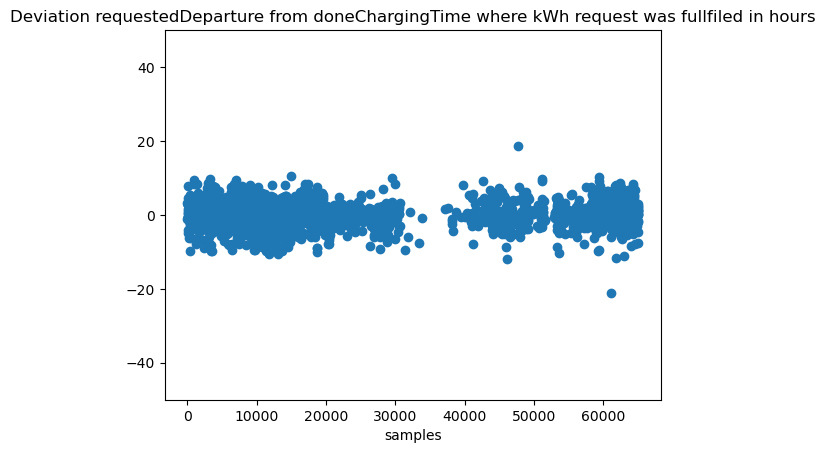

In [148]:
def calcDiffDepartAndDoneCharging(entry):
    
    return (entry['requestedDeparture']-entry['doneChargingTime']).total_seconds()/60/60

dfDeliveredKwh = dfWithDoneChargingTimeAndUserInputs[dfWithDoneChargingTimeAndUserInputs['kWhDelivered'] >= dfWithDoneChargingTimeAndUserInputs['kWhRequested']]

dfCalc = dfDeliveredKwh.apply(lambda row: calcDiffDepartAndDoneCharging(row), axis=1)

plt.scatter(dfDeliveredKwh.index, dfCalc, marker='o', linestyle='-')

# Set x and y-axis limits
#plt.xlim(left=0, right=len(df.index) - 1)  # Adjust left and right as needed
plt.ylim(bottom=-50, top=50)  # Adjust bottom as needed


# Set labels and title
plt.xlabel('samples')
#plt.ylabel()
plt.title('Deviation requestedDeparture from doneChargingTime where kWh request was fullfiled in hours')

# Show the plot
plt.show()

Positive values mean that the 'doneChargingTime' was before the originally requested departure time.
Negative values mean that the actual departure was later than requested originally and the 'doneChargingTime' was also after the originally requested departure time. 
#### Too many deviations from 'requestedDeparture' and 'doneChargingTime'

### Average delivered kWh per hour 

Look at samples with 'doneChargingTime' and calculate the charging time. Then get the average by looking at the delivered kWh. Maybe we can use that to estimate the missing values of doneChargingTime where we have kWhRequested from userInputs. Since it seems that the doneChargingTime is influenced by the utilization of the stations, hope is not great.

In [149]:
dfWithDoneChargingTime['chargingTimeInH'] = dfWithDoneChargingTime['doneChargingTime'] - dfWithDoneChargingTime['connectionTime']
dfWithDoneChargingTime['chargingTimeInH'] = dfWithDoneChargingTime['chargingTimeInH'].apply(lambda x: x.total_seconds()/60/60)
dfWithDoneChargingTime = dfWithDoneChargingTime[dfWithDoneChargingTime['chargingTimeInH'] > 0]
dfWithDoneChargingTime['kWhPerH'] = dfWithDoneChargingTime['kWhDelivered']/dfWithDoneChargingTime['chargingTimeInH']
dfWithDoneChargingTime = dfWithDoneChargingTime.dropna(subset=['kWhPerH'])


In [150]:
dfWithDoneChargingTime['kWhPerH'].var()

45.04755073965955

The kWh per hour values vary far too much, which strongly suggests that you have to look very closely at the utilisation of the stations here. But there could also be another logic behind the charging scheduling which is not deducible from the given dataset.

#### Since "only" 6% of the samples are missing doneChargingTime, and we would need to make assumptions that we are not sure about to further investigate this matter, and we dont know how important this feature will be for our further work at this moment, we just leave it like it is. Later we can consider if we drop the samples with missing values or drop the feature itself or make further investigations (which is unlikely).

## Next Steps


- Merge charging and weather data
- Look for the amount missing values in weather data after merging
- Check if there are other weather data available somewhere else
- (Maybe) separate charging data depending on sideID and check for doneCharging/disconnectTime differences

## Merging the two DataFrames

In [151]:
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65037 entries, 0 to 65036
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        65037 non-null  object             
 1   connectionTime            65037 non-null  datetime64[ns, UTC]
 2   disconnectTime            65037 non-null  datetime64[ns, UTC]
 3   doneChargingTime          60950 non-null  datetime64[ns, UTC]
 4   kWhDelivered              65037 non-null  float64            
 5   sessionID                 65037 non-null  object             
 6   siteID                    65037 non-null  int64              
 7   spaceID                   65037 non-null  object             
 8   stationID                 65037 non-null  object             
 9   timezone                  65037 non-null  object             
 10  userID                    47822 non-null  float64            
 11  userInputs          

In [152]:
dfWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29244 non-null  float64
 3   cloud_cover              29244 non-null  float64
 4   cloud_cover_description  29244 non-null  object 
 5   pressure                 29244 non-null  float64
 6   windspeed                29244 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29244 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [153]:
# Convert the type object to datetime
dfWeather["timestamp"] = pd.to_datetime(dfWeather["timestamp"])

In [154]:
# Convert to datetime without timezone information
dfFull['connectionTime'] = dfCharging['connectionTime'].dt.tz_localize(None)

In [155]:
dfFull['connectionTime'].head()

0   2020-01-02 13:08:54
1   2020-01-02 13:36:50
2   2020-01-02 13:56:35
3   2020-01-02 13:59:58
4   2020-01-02 14:00:01
Name: connectionTime, dtype: datetime64[ns]

In [156]:
dfWeather['timestamp'].head()

0   2018-01-01 08:53:00
1   2018-01-01 09:53:00
2   2018-01-01 10:53:00
3   2018-01-01 11:53:00
4   2018-01-01 12:53:00
Name: timestamp, dtype: datetime64[ns]

In [157]:
# Sort values for merge_asof to work
dfFull.sort_values('connectionTime', inplace=True)
dfWeather.sort_values('timestamp', inplace=True)

# Merge the two datasets according to their timestamps. 
# Use merge_asof to merge according to the nearest timestamp found in dfWeather with a tolerance of 5 hours
dfMerged = pd.merge_asof(dfFull, dfWeather, left_on = "connectionTime", right_on = "timestamp", tolerance = pd.Timedelta(hours=5))
    

In [158]:
dfMerged.isnull().sum()

id                              0
connectionTime                  0
disconnectTime                  0
doneChargingTime             4087
kWhDelivered                    0
sessionID                       0
siteID                          0
spaceID                         0
stationID                       0
timezone                        0
userID                      17215
userInputs                  17215
calculatedDuration           4087
calculatedDurationHours      4087
chargingDuration             4087
disconnectDuration              0
doneChargingDuration         4087
doneToDisconnectDuration     4087
requestedDeparture          17215
kWhRequested                17215
city                         9013
timestamp                    9013
temperature                  9013
cloud_cover                  9013
cloud_cover_description      9013
pressure                     9013
windspeed                    9013
precipitation                9013
felt_temperature             9013
dtype: int64

**We are missing weather data for 9013 observations in the charging data.**

# Utilization Prediction

We now want to predict the hourly utilization of the two sites. We have considered that utilization could be the number of connected cars or the amount of energy consumed. This would allow us to predict on the one hand how many spaces should be available and an the other hand how much energy the operator should provide. 
We choosed the first possibility to predict the utilization.  
So in the following we want to predict the hourly number of connected cars for each of the two sites. So this means how many parking slots are occupied.

## Data Preparation for Prediction

In [159]:
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65037 entries, 0 to 65036
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        65037 non-null  object             
 1   connectionTime            65037 non-null  datetime64[ns]     
 2   disconnectTime            65037 non-null  datetime64[ns, UTC]
 3   doneChargingTime          60950 non-null  datetime64[ns, UTC]
 4   kWhDelivered              65037 non-null  float64            
 5   sessionID                 65037 non-null  object             
 6   siteID                    65037 non-null  int64              
 7   spaceID                   65037 non-null  object             
 8   stationID                 65037 non-null  object             
 9   timezone                  65037 non-null  object             
 10  userID                    47822 non-null  float64            
 11  userInputs     

**For our predictions we don't need all of the given columns so we first remove the columns we obviously don't need for the predictions.:**

In [160]:
print(dfMerged["timezone"].unique())

['America/Los_Angeles']


In [161]:
print(dfMerged["city"].unique())

['Burbank' nan]


Because all rows have the same entry in the column "timezone" and "city" we can drop this column

In [162]:
#remove columns we don't need for our predictions
dfMerged = dfMerged.drop('id', axis=1)
dfMerged = dfMerged.drop('sessionID', axis=1)
dfMerged = dfMerged.drop('spaceID', axis=1)
dfMerged = dfMerged.drop('stationID', axis=1)
dfMerged = dfMerged.drop('timezone', axis=1)
dfMerged = dfMerged.drop('userID', axis=1)
dfMerged = dfMerged.drop('calculatedDuration', axis=1) #because charging duration in hours is enough
dfMerged = dfMerged.drop('calculatedDurationHours', axis=1) #beceause it is the same as the column chargingDuration
dfMerged = dfMerged.drop('doneChargingDuration', axis=1) #beceause we already have this in hours
dfMerged = dfMerged.drop('city', axis=1)
dfMerged = dfMerged.drop('timestamp', axis=1) #because it was merged to connectiontime

In [163]:
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65037 entries, 0 to 65036
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   connectionTime            65037 non-null  datetime64[ns]     
 1   disconnectTime            65037 non-null  datetime64[ns, UTC]
 2   doneChargingTime          60950 non-null  datetime64[ns, UTC]
 3   kWhDelivered              65037 non-null  float64            
 4   siteID                    65037 non-null  int64              
 5   userInputs                47822 non-null  object             
 6   chargingDuration          60950 non-null  float64            
 7   disconnectDuration        65037 non-null  timedelta64[ns]    
 8   doneToDisconnectDuration  60950 non-null  timedelta64[ns]    
 9   requestedDeparture        47822 non-null  datetime64[ns, UTC]
 10  kWhRequested              47822 non-null  float64            
 11  temperature    

We will start with predicting the number of connected cars for each of the two sites.

**Remove all columns we don't need to predict the number of connected cars or to create features for this prediction:**

In [164]:
#remove columns we don't need as features for our prediction and that we don't need to create new features
dfMerged = dfMerged.drop('doneChargingTime', axis=1)
dfMerged = dfMerged.drop('kWhDelivered', axis=1)
dfMerged = dfMerged.drop('userInputs', axis=1)
dfMerged = dfMerged.drop('chargingDuration', axis=1)
dfMerged = dfMerged.drop('disconnectDuration', axis=1)
dfMerged = dfMerged.drop('doneToDisconnectDuration', axis=1)
dfMerged = dfMerged.drop('requestedDeparture', axis=1)
dfMerged = dfMerged.drop('kWhRequested', axis=1)
dfMerged = dfMerged.drop('cloud_cover_description', axis=1) #because we already have the cloud_cover in the data 

dfMerged.head()

,connectionTime,disconnectTime,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
0,2018-04-25 11:08:04,2018-04-25 13:20:10+00:00,2,12.0,26.0,989.11,11.0,0.0,12.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16+00:00,2,12.0,20.0,989.44,9.0,0.0,12.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45+00:00,2,12.0,20.0,989.44,9.0,0.0,12.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34+00:00,2,12.0,20.0,989.44,7.0,0.0,12.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12+00:00,2,12.0,20.0,989.44,7.0,0.0,12.0


In [165]:
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65037 entries, 0 to 65036
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   connectionTime    65037 non-null  datetime64[ns]     
 1   disconnectTime    65037 non-null  datetime64[ns, UTC]
 2   siteID            65037 non-null  int64              
 3   temperature       56024 non-null  float64            
 4   cloud_cover       56024 non-null  float64            
 5   pressure          56024 non-null  float64            
 6   windspeed         56024 non-null  float64            
 7   precipitation     56024 non-null  float64            
 8   felt_temperature  56024 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), int64(1)
memory usage: 4.5 MB


As we need the weather data for the prediction, we delete all rows with zero values

In [166]:
#delete all rows with null-values
dfMerged = dfMerged.dropna()
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56024 entries, 0 to 56126
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   connectionTime    56024 non-null  datetime64[ns]     
 1   disconnectTime    56024 non-null  datetime64[ns, UTC]
 2   siteID            56024 non-null  int64              
 3   temperature       56024 non-null  float64            
 4   cloud_cover       56024 non-null  float64            
 5   pressure          56024 non-null  float64            
 6   windspeed         56024 non-null  float64            
 7   precipitation     56024 non-null  float64            
 8   felt_temperature  56024 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), int64(1)
memory usage: 4.3 MB


From one row in the dataset create multiple rows for every hour the respective car of the row was connected. We have to do this, so we can calculate the number of connected cars during the different hours.

In [167]:
#Get the hour and date of the connectionTime and the disconnecTtime and create additional columns
#dfMerged['connectionDate'] = dfMerged['connectionTime'].dt.date
#dfMerged['connectionHour'] = dfMerged['connectionTime'].dt.hour
#dfMerged['disconnectDate'] = dfMerged['disconnectTime'].dt.date
#dfMerged['disconnectHour'] = dfMerged['disconnectTime'].dt.hour

#remove the old columns
#dfMerged = dfMerged.drop('connectionTime', axis=1)
#dfMerged = dfMerged.drop('disconnectTime', axis=1)
#dfMerged = dfMerged.drop('disconnectDuration', axis=1)

#put the new columns to the beginning
#dfMerged = dfMerged[['connectionDate', 'connectionHour', 'disconnectDate', 'disconnectHour', 
#                    'siteID', 'temperature', 'cloud_cover', 'cloud_cover_description', 
#                    'pressure', 'windspeed', 'precipitation', 'felt_temperature']]

#dfMerged.head()

In [168]:
#bis hier gekommen

In [169]:
dfMerged['connectionTime'] = pd.DatetimeIndex(dfMerged['connectionTime']).floor('H')
dfMerged['disconnectTime'] = pd.DatetimeIndex(dfMerged['disconnectTime']).floor('H')
dfMerged

,connectionTime,disconnectTime,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
0,2018-04-25 11:00:00,2018-04-25 13:00:00+00:00,2,12.0,26.0,989.11,11.0,0.0,12.0
1,2018-04-25 13:00:00,2018-04-26 00:00:00+00:00,2,12.0,20.0,989.44,9.0,0.0,12.0
2,2018-04-25 13:00:00,2018-04-25 23:00:00+00:00,2,12.0,20.0,989.44,9.0,0.0,12.0
3,2018-04-25 14:00:00,2018-04-25 23:00:00+00:00,2,12.0,20.0,989.44,7.0,0.0,12.0
4,2018-04-25 14:00:00,2018-04-25 23:00:00+00:00,2,12.0,20.0,989.44,7.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...
56122,2020-12-31 03:00:00,2020-12-31 06:00:00+00:00,1,13.0,33.0,992.41,6.0,0.0,13.0
56123,2020-12-31 16:00:00,2020-12-31 17:00:00+00:00,2,6.0,34.0,987.14,0.0,0.0,6.0
56124,2020-12-31 16:00:00,2020-12-31 17:00:00+00:00,2,6.0,34.0,987.14,0.0,0.0,6.0
56125,2020-12-31 17:00:00,2020-12-31 18:00:00+00:00,2,13.0,34.0,987.14,19.0,0.0,13.0


In [170]:
dfMerged['disconnectTime'] = dfMerged['disconnectTime'].dt.tz_localize(None)

In [171]:
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56024 entries, 0 to 56126
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   connectionTime    56024 non-null  datetime64[ns]
 1   disconnectTime    56024 non-null  datetime64[ns]
 2   siteID            56024 non-null  int64         
 3   temperature       56024 non-null  float64       
 4   cloud_cover       56024 non-null  float64       
 5   pressure          56024 non-null  float64       
 6   windspeed         56024 non-null  float64       
 7   precipitation     56024 non-null  float64       
 8   felt_temperature  56024 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(1)
memory usage: 4.3 MB


In [172]:
from datetime import timedelta

# Create a function to generate rows for each hour
def generate_rows(row):
    start = row['connectionTime']
    end = row['disconnectTime']
    time_diff = end - start  # Calculate the time difference
    hours_diff = int(time_diff.total_seconds() // 3600)

    # Generate new rows
    new_rows = pd.DataFrame({
        'Hour': [start + timedelta(hours=i) for i in range(hours_diff + 1)],
    })

    # Repeat the additional information for each generated row
    for col in dfMerged.columns:
        new_rows[col] = row[col]
    
    return new_rows

# Apply the function to each row and concatenate the results
dfPrediction1 = pd.concat(dfMerged.apply(generate_rows, axis=1).tolist(), ignore_index=True)

# Drop unnecessary columns
dfPrediction1 = dfPrediction1.drop(columns=['connectionTime', 'disconnectTime'])


In [173]:
dfPrediction1

,Hour,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
0,2018-04-25 11:00:00,2,12.0,26.0,989.11,11.0,0.0,12.0
1,2018-04-25 12:00:00,2,12.0,26.0,989.11,11.0,0.0,12.0
2,2018-04-25 13:00:00,2,12.0,26.0,989.11,11.0,0.0,12.0
3,2018-04-25 13:00:00,2,12.0,20.0,989.44,9.0,0.0,12.0
4,2018-04-25 14:00:00,2,12.0,20.0,989.44,9.0,0.0,12.0
...,...,...,...,...,...,...,...,...
419358,2020-12-31 18:00:00,2,13.0,34.0,987.14,19.0,0.0,13.0
419359,2020-12-31 18:00:00,1,13.0,34.0,986.81,22.0,0.0,13.0
419360,2020-12-31 19:00:00,1,13.0,34.0,986.81,22.0,0.0,13.0
419361,2020-12-31 20:00:00,1,13.0,34.0,986.81,22.0,0.0,13.0


In [174]:
#Split the Hour column in date and hour
dfPrediction1['date'] = dfPrediction1['Hour'].dt.date
dfPrediction1['date'] = pd.to_datetime(dfPrediction1['date'])
dfPrediction1['hour'] = dfPrediction1['Hour'].dt.hour
dfPrediction1 = dfPrediction1.drop('Hour', axis=1)
dfPrediction1

,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,date,hour
0,2,12.0,26.0,989.11,11.0,0.0,12.0,2018-04-25,11
1,2,12.0,26.0,989.11,11.0,0.0,12.0,2018-04-25,12
2,2,12.0,26.0,989.11,11.0,0.0,12.0,2018-04-25,13
3,2,12.0,20.0,989.44,9.0,0.0,12.0,2018-04-25,13
4,2,12.0,20.0,989.44,9.0,0.0,12.0,2018-04-25,14
...,...,...,...,...,...,...,...,...,...
419358,2,13.0,34.0,987.14,19.0,0.0,13.0,2020-12-31,18
419359,1,13.0,34.0,986.81,22.0,0.0,13.0,2020-12-31,18
419360,1,13.0,34.0,986.81,22.0,0.0,13.0,2020-12-31,19
419361,1,13.0,34.0,986.81,22.0,0.0,13.0,2020-12-31,20


In [175]:
dfPrediction1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419363 entries, 0 to 419362
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   siteID            419363 non-null  int64         
 1   temperature       419363 non-null  float64       
 2   cloud_cover       419363 non-null  float64       
 3   pressure          419363 non-null  float64       
 4   windspeed         419363 non-null  float64       
 5   precipitation     419363 non-null  float64       
 6   felt_temperature  419363 non-null  float64       
 7   date              419363 non-null  datetime64[ns]
 8   hour              419363 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1)
memory usage: 27.2 MB


In [176]:
#put the new columns to the beginning
dfPrediction1 = dfPrediction1[['date', 'hour', 'siteID', 'temperature',
                               'cloud_cover', 'pressure', 
                               'windspeed', 'precipitation', 'felt_temperature']]
dfPrediction1

,date,hour,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
0,2018-04-25,11,2,12.0,26.0,989.11,11.0,0.0,12.0
1,2018-04-25,12,2,12.0,26.0,989.11,11.0,0.0,12.0
2,2018-04-25,13,2,12.0,26.0,989.11,11.0,0.0,12.0
3,2018-04-25,13,2,12.0,20.0,989.44,9.0,0.0,12.0
4,2018-04-25,14,2,12.0,20.0,989.44,9.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...
419358,2020-12-31,18,2,13.0,34.0,987.14,19.0,0.0,13.0
419359,2020-12-31,18,1,13.0,34.0,986.81,22.0,0.0,13.0
419360,2020-12-31,19,1,13.0,34.0,986.81,22.0,0.0,13.0
419361,2020-12-31,20,1,13.0,34.0,986.81,22.0,0.0,13.0


In [177]:
dfPrediction1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419363 entries, 0 to 419362
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              419363 non-null  datetime64[ns]
 1   hour              419363 non-null  int32         
 2   siteID            419363 non-null  int64         
 3   temperature       419363 non-null  float64       
 4   cloud_cover       419363 non-null  float64       
 5   pressure          419363 non-null  float64       
 6   windspeed         419363 non-null  float64       
 7   precipitation     419363 non-null  float64       
 8   felt_temperature  419363 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1)
memory usage: 27.2 MB


**Adding new features:**

Show number of parked cars per hour:

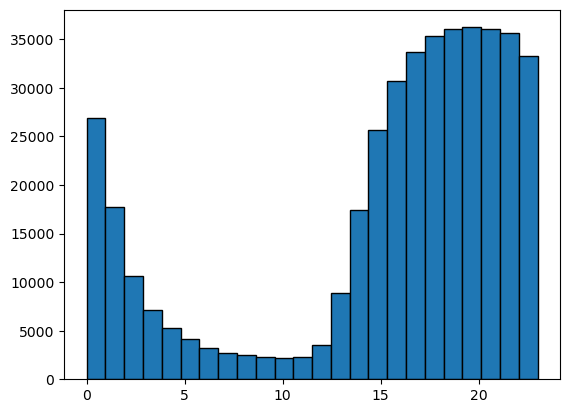

In [178]:
# show the number of parked cars per hour
data = dfPrediction1['hour']
plt.hist(data, bins = 24, edgecolor='k')
plt.show()

The graphics show a clear difference between the different times of day. For this reason, we create a feature that indicates the respective time of day. We divide the day into 07:00 to 10:00 morning, 11:00 to 12:00 late morning, 13:00 to 14:00 noon, 15:00 to 17:00 afternoon, 18:00 to 21:00 evening and 22:00 to 06:00 night.

We will also look at some other additional features. In the following is a list of all features.

Features we want to look at:
- hour
- temperature
- cloud_cover
- pressure
- windspeed
- precipitation
- felt_temperature
- timeOfDay
- dayOfWeek
- isWeekend
- season

The features hour, temperature, cloud_cover, pressure, windspeed, precipitation and felt_temperature are already included in the dataset. We now need to add the columns timeOfDay, dayOfWeek, isWeekend and season.

- timeOfDay gives back an integer value between 0 and 6 (0=morning, ..., 5=night)
- dayOfWeek gives back an integer value between 0 and 6 (0=Monday, ... ,6=Sunday)- 
isWeekend gives back 0 when its a weekday, and 1 when it ison weekend
- season gives back an integer value between 1 and 4 ( 1=winter, 2=spring, 3=summer, 4=fall)
- cloud_cover_description gives back an integer betwll)

In [179]:
#Add column timeOfDay
def timeOfDay(hour):
    if hour >= 7 and hour <= 10:
        return 0
    elif hour >= 11 and hour <= 12:
        return 1
    elif hour >= 13 and hour <= 14:
        return 2
    elif hour >= 15 and hour <= 17: 
        return 3
    elif hour >= 18 and hour <= 21: 
        return 4
    else:
        return 5

dfPrediction1['timeOfDay'] = dfPrediction1['hour'].map(timeOfDay)
dfPrediction1.head()

,date,hour,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay
0,2018-04-25,11,2,12.0,26.0,989.11,11.0,0.0,12.0,1
1,2018-04-25,12,2,12.0,26.0,989.11,11.0,0.0,12.0,1
2,2018-04-25,13,2,12.0,26.0,989.11,11.0,0.0,12.0,2
3,2018-04-25,13,2,12.0,20.0,989.44,9.0,0.0,12.0,2
4,2018-04-25,14,2,12.0,20.0,989.44,9.0,0.0,12.0,2


In [180]:
#Add columne dayOfWeek
dfPrediction1['dayOfWeek'] = dfPrediction1['date'].dt.weekday
dfPrediction1.head()

,date,hour,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek
0,2018-04-25,11,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2
1,2018-04-25,12,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2
2,2018-04-25,13,2,12.0,26.0,989.11,11.0,0.0,12.0,2,2
3,2018-04-25,13,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2
4,2018-04-25,14,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2


In [181]:
#Add column IsWeekend
def isWeekend(dayOfWeek):
    if dayOfWeek >= 5:
        return 1
    else:
        return 0
        
dfPrediction1['isWeekend'] = dfPrediction1['dayOfWeek'].map(isWeekend)
dfPrediction1.head()

,date,hour,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend
0,2018-04-25,11,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0
1,2018-04-25,12,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0
2,2018-04-25,13,2,12.0,26.0,989.11,11.0,0.0,12.0,2,2,0
3,2018-04-25,13,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0
4,2018-04-25,14,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0


In [182]:
# add season feature
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = {}
for k in range(1, 13):
    month_to_season[k]= seasons[k-1]
month_to_season
# 1= winter , 2= spring , 3= summer , 4= fall

dfPrediction1 = dfPrediction1.assign(season=lambda x: x["date"].apply(lambda s: month_to_season[s.month]))
dfPrediction1.head()

,date,hour,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-04-25,11,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
1,2018-04-25,12,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
2,2018-04-25,13,2,12.0,26.0,989.11,11.0,0.0,12.0,2,2,0,2
3,2018-04-25,13,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2
4,2018-04-25,14,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2


In [183]:
#Add the column numOfConnectedCars to the dataset, as this should be the output-variable
dfPrediction1['numberOfConnectedCars'] = 0
dfPrediction1.head()

,date,hour,siteID,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season,numberOfConnectedCars
0,2018-04-25,11,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2,0
1,2018-04-25,12,2,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2,0
2,2018-04-25,13,2,12.0,26.0,989.11,11.0,0.0,12.0,2,2,0,2,0
3,2018-04-25,13,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2,0
4,2018-04-25,14,2,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2,0


### Preparation for site 1:  

In [184]:
#filter the data for the site with id 1
dfPrediction1Site1 = dfPrediction1.loc[dfPrediction1['siteID'] == 1]
dfPrediction1Site1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222715 entries, 59442 to 419362
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   222715 non-null  datetime64[ns]
 1   hour                   222715 non-null  int32         
 2   siteID                 222715 non-null  int64         
 3   temperature            222715 non-null  float64       
 4   cloud_cover            222715 non-null  float64       
 5   pressure               222715 non-null  float64       
 6   windspeed              222715 non-null  float64       
 7   precipitation          222715 non-null  float64       
 8   felt_temperature       222715 non-null  float64       
 9   timeOfDay              222715 non-null  int64         
 10  dayOfWeek              222715 non-null  int32         
 11  isWeekend              222715 non-null  int64         
 12  season                 222715 non-null  int64

**Group dataframe by date and hour:**

In [185]:
#Group the dfPrediction1Site1 dataset by date and hour and count the connections per group by showing the line numberOfConnectedCars
dfNumberOfConnectedCarsGrouped = dfPrediction1Site1.groupby(["date", "hour"])['numberOfConnectedCars'].count().reset_index()

In [186]:
dfNumberOfConnectedCarsGrouped 

,date,hour,numberOfConnectedCars
0,2018-09-05,11,2
1,2018-09-05,12,4
2,2018-09-05,13,11
3,2018-09-05,14,16
4,2018-09-05,15,15
...,...,...,...
11947,2020-12-31,6,1
11948,2020-12-31,18,1
11949,2020-12-31,19,1
11950,2020-12-31,20,1


In [187]:
#drop the column numberOfConnectedCars and siteID in the dfPrediction1Site1 dataset
dfPrediction1Site1 = dfPrediction1Site1.drop('numberOfConnectedCars', axis=1)
dfPrediction1Site1 = dfPrediction1Site1.drop('siteID', axis=1)
dfPrediction1Site1

,date,hour,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
59442,2018-09-05,11,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
59443,2018-09-05,12,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
59444,2018-09-05,13,19.0,26.0,984.50,0.0,0.0,19.0,2,2,0,4
59445,2018-09-05,14,19.0,26.0,984.50,0.0,0.0,19.0,2,2,0,4
59446,2018-09-05,15,19.0,26.0,984.50,0.0,0.0,19.0,3,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
419352,2020-12-31,6,13.0,33.0,992.41,6.0,0.0,13.0,5,3,0,1
419359,2020-12-31,18,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
419360,2020-12-31,19,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
419361,2020-12-31,20,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1


In [188]:
# merge the grouped dataset with the numberOfConnectedCars per group with the dfPrediction1Site1 dataset, to add the other features per group
dfTest = pd.merge(dfNumberOfConnectedCarsGrouped, dfPrediction1Site1, on =['date','hour'], how = 'left')
dfTest

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-09-05,11,2,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
1,2018-09-05,11,2,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
2,2018-09-05,12,4,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
3,2018-09-05,12,4,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
4,2018-09-05,12,4,19.0,26.0,984.83,6.0,0.0,19.0,1,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222710,2020-12-31,6,1,13.0,33.0,992.41,6.0,0.0,13.0,5,3,0,1
222711,2020-12-31,18,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
222712,2020-12-31,19,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
222713,2020-12-31,20,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1


In [189]:
dfTestdropped = dfTest.drop_duplicates()
dfTestdropped

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-09-05,11,2,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
2,2018-09-05,12,4,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
4,2018-09-05,12,4,19.0,26.0,984.83,6.0,0.0,19.0,1,2,0,4
6,2018-09-05,13,11,19.0,26.0,984.50,0.0,0.0,19.0,2,2,0,4
8,2018-09-05,13,11,19.0,26.0,984.83,6.0,0.0,19.0,2,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222710,2020-12-31,6,1,13.0,33.0,992.41,6.0,0.0,13.0,5,3,0,1
222711,2020-12-31,18,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
222712,2020-12-31,19,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
222713,2020-12-31,20,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1


In [190]:
# define a dictionary that maps features to aggreagation routines
agg_dict = {'numberOfConnectedCars':"max", 'temperature':"mean", 'cloud_cover':"max", 'pressure':"max", 'windspeed':"max", 'precipitation':"max", 'felt_temperature':"max", 'timeOfDay':"max", 'dayOfWeek':"max", 'isWeekend':"max", 'season':"max"}

In [191]:
#aggregate the dfTestdroppedGrouped dataset so we only have left as many lines as there are different date and hour combinations and these are not duplicated by different values of the other features.
dfTestdroppedGrouped = dfTestdropped.groupby(["date", "hour"]).agg(agg_dict).reset_index()
dfTestdroppedGrouped

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-09-05,11,2,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
1,2018-09-05,12,4,19.0,26.0,984.83,6.0,0.0,19.0,1,2,0,4
2,2018-09-05,13,11,19.0,28.0,986.15,7.0,0.0,19.0,2,2,0,4
3,2018-09-05,14,16,19.0,28.0,986.15,7.0,0.0,19.0,2,2,0,4
4,2018-09-05,15,15,19.0,28.0,986.15,7.0,0.0,19.0,3,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11947,2020-12-31,6,1,13.0,33.0,992.41,6.0,0.0,13.0,5,3,0,1
11948,2020-12-31,18,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
11949,2020-12-31,19,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
11950,2020-12-31,20,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1


In [192]:
dfTestdroppedClean = dfTestdroppedGrouped.drop_duplicates()

In [193]:
#save the prepared dataframe for regression again in the variable dfPrediction1Site1
dfPrediction1Site1 = dfTestdroppedClean
dfPrediction1Site1

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-09-05,11,2,19.0,26.0,984.50,0.0,0.0,19.0,1,2,0,4
1,2018-09-05,12,4,19.0,26.0,984.83,6.0,0.0,19.0,1,2,0,4
2,2018-09-05,13,11,19.0,28.0,986.15,7.0,0.0,19.0,2,2,0,4
3,2018-09-05,14,16,19.0,28.0,986.15,7.0,0.0,19.0,2,2,0,4
4,2018-09-05,15,15,19.0,28.0,986.15,7.0,0.0,19.0,3,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11947,2020-12-31,6,1,13.0,33.0,992.41,6.0,0.0,13.0,5,3,0,1
11948,2020-12-31,18,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
11949,2020-12-31,19,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1
11950,2020-12-31,20,1,13.0,34.0,986.81,22.0,0.0,13.0,4,3,0,1


**Feature evaluation:**

Test which features should be selected for the prediction.  
We now use one the Variance Criteria and the Correlation Criteria, because we only have a handful of features.

Variance:

In [194]:
dfPrediction1Site1[['hour', 'numberOfConnectedCars', 'temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation', 'felt_temperature', 'timeOfDay', 'dayOfWeek', 'isWeekend', 'season']].var()

hour                      56.364555
numberOfConnectedCars    443.661870
temperature               32.915541
cloud_cover               15.531201
pressure                  14.215645
windspeed                 54.559900
precipitation              0.484425
felt_temperature          41.382417
timeOfDay                  2.270352
dayOfWeek                  3.293865
isWeekend                  0.160645
season                     1.378121
dtype: float64

Correlations:

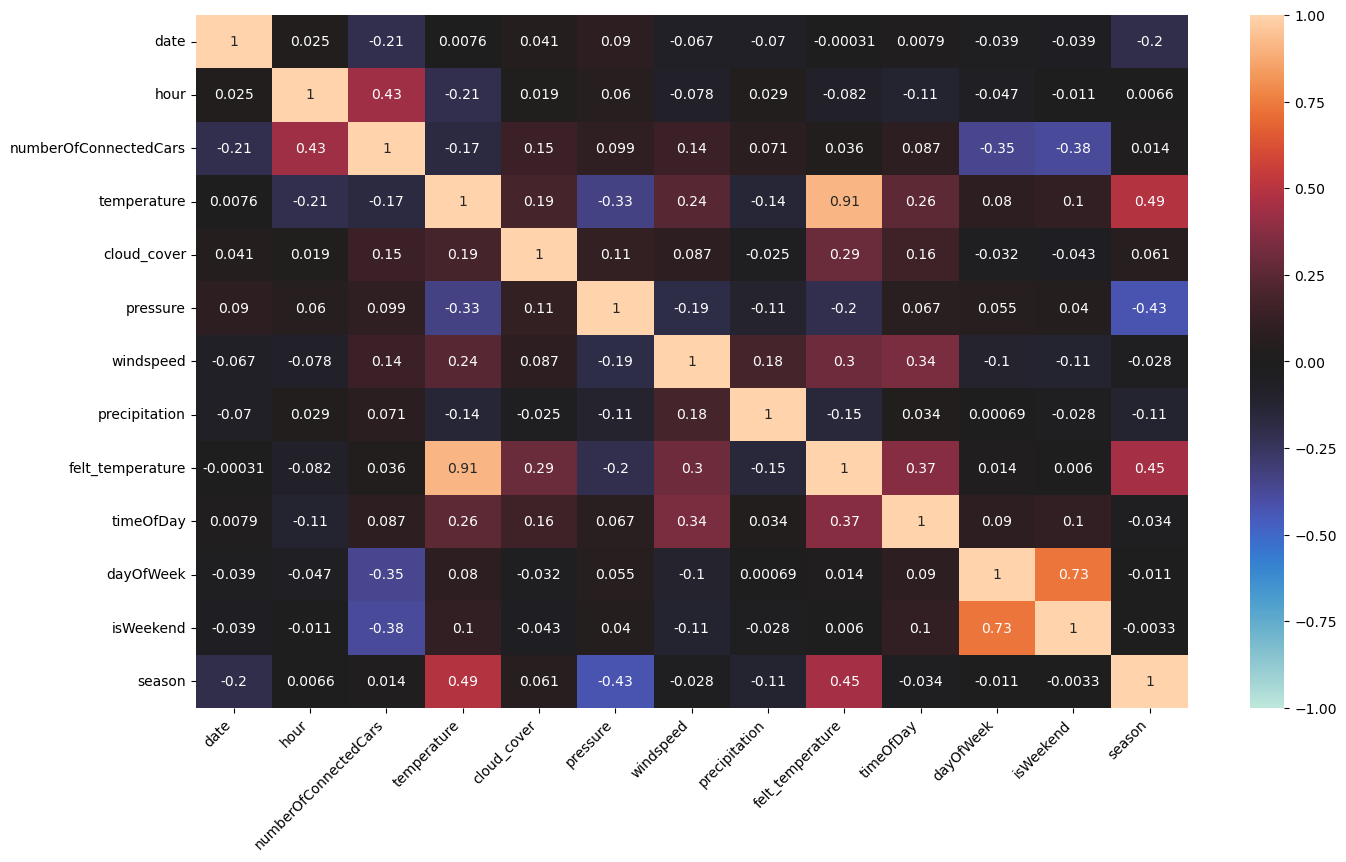

In [195]:
corrCars = dfPrediction1Site1.corr()
plt.figure(figsize = (16,9))
ax = sns.heatmap(corrCars, vmin = -1, vmax= 1, center = 0, annot=True)

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = 'right')

ax.set_yticklabels(ax.get_yticklabels(),
                   rotation =0,
                   horizontalalignment = 'right')

plt.show()

As we can see, the features temperature and felt_temperature are highly correlated with each other, which is why we will eliminate the felt_temperature feature. Since we have not so much features, we will keep all of the other features for prediction.

In [196]:
#drop feature felt_temperature
dfPrediction1Site1 = dfPrediction1Site1.drop('felt_temperature', axis=1)
dfPrediction1Site1

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,timeOfDay,dayOfWeek,isWeekend,season
0,2018-09-05,11,2,19.0,26.0,984.50,0.0,0.0,1,2,0,4
1,2018-09-05,12,4,19.0,26.0,984.83,6.0,0.0,1,2,0,4
2,2018-09-05,13,11,19.0,28.0,986.15,7.0,0.0,2,2,0,4
3,2018-09-05,14,16,19.0,28.0,986.15,7.0,0.0,2,2,0,4
4,2018-09-05,15,15,19.0,28.0,986.15,7.0,0.0,3,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
11947,2020-12-31,6,1,13.0,33.0,992.41,6.0,0.0,5,3,0,1
11948,2020-12-31,18,1,13.0,34.0,986.81,22.0,0.0,4,3,0,1
11949,2020-12-31,19,1,13.0,34.0,986.81,22.0,0.0,4,3,0,1
11950,2020-12-31,20,1,13.0,34.0,986.81,22.0,0.0,4,3,0,1


**Visualisation of dependencies:**

In [197]:
# hour of connected cars 
df1 = dfPrediction1Site1[['hour', 'numberOfConnectedCars']].groupby('hour').mean()

#temperature
x2 = dfPrediction1Site1['temperature'].values

#min_temperature
df3 = dfPrediction1Site1[['cloud_cover', 'numberOfConnectedCars']].groupby('cloud_cover').mean()

#pressure
x4 = dfPrediction1Site1['pressure'].values

#windspeed
df5 = dfPrediction1Site1[['windspeed', 'numberOfConnectedCars']].groupby('windspeed').mean()

#precipitation
df6 = dfPrediction1Site1[['precipitation', 'numberOfConnectedCars']].groupby('precipitation').mean()

#timeOfDay
df7 = dfPrediction1Site1[['timeOfDay', 'numberOfConnectedCars']].groupby('timeOfDay').mean()

#day of Week
df8 = dfPrediction1Site1[['dayOfWeek', 'numberOfConnectedCars']].groupby('dayOfWeek').mean()

# is weekend
df9 = dfPrediction1Site1[['isWeekend', 'numberOfConnectedCars']].groupby('isWeekend').mean()

#season
df10 = dfPrediction1Site1[['season', 'numberOfConnectedCars']].groupby('season').mean()

yscatter = dfPrediction1Site1['numberOfConnectedCars'].values 

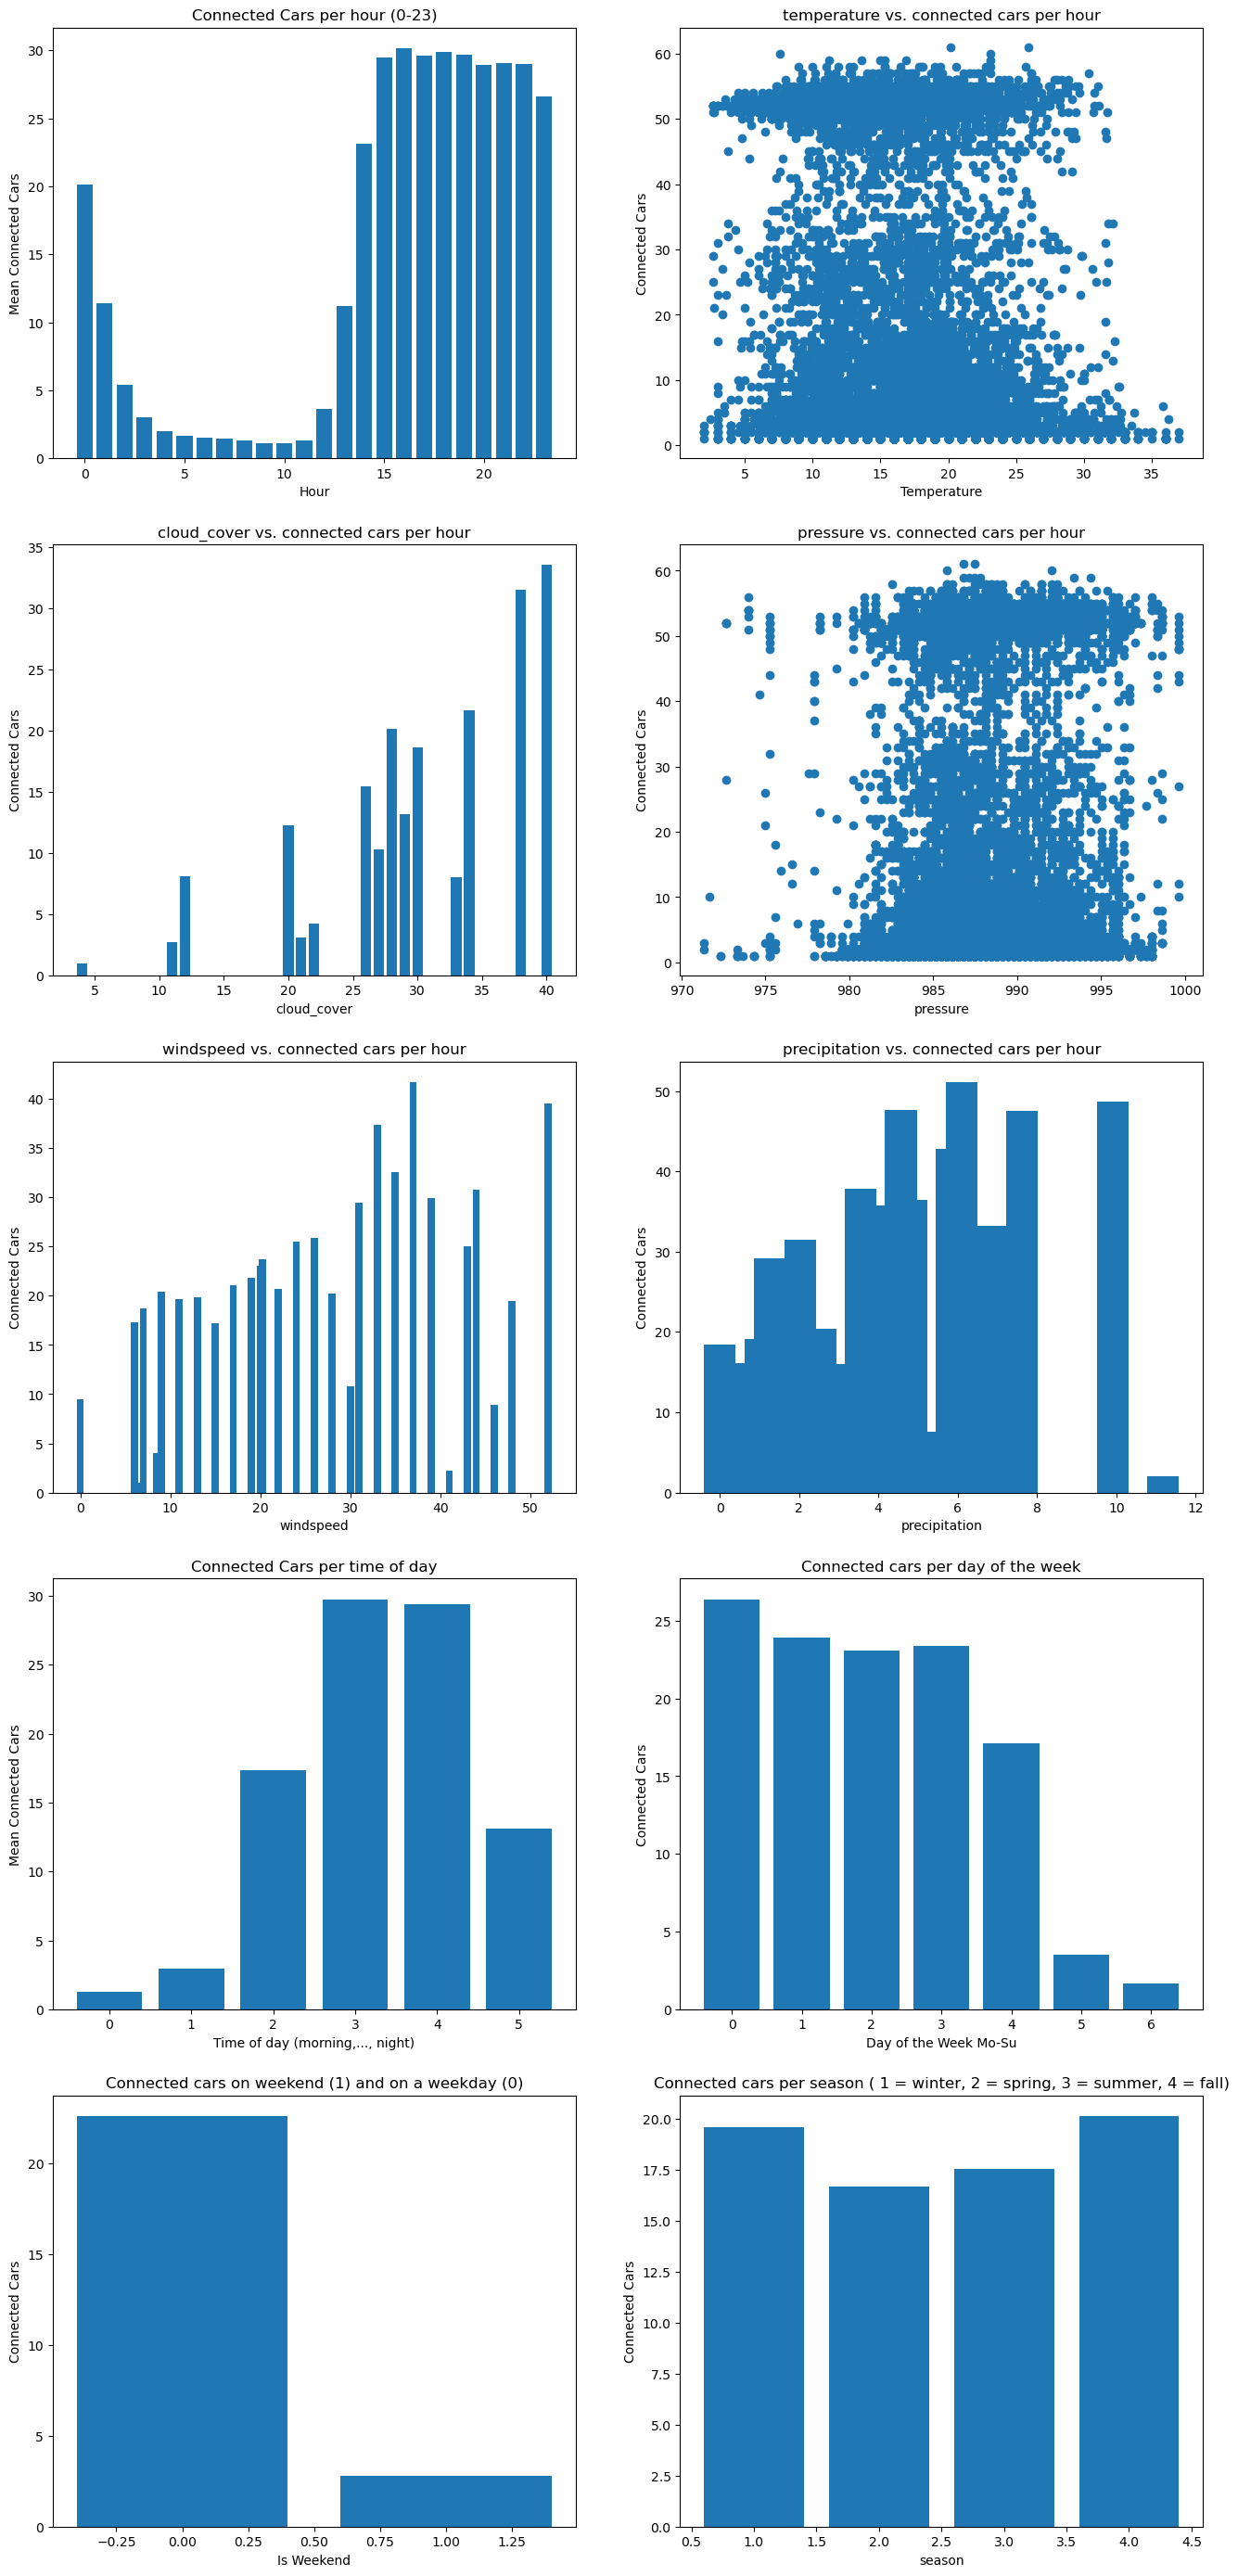

In [198]:
Fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 35))

# subplot no. 1
plt.subplot(5,2,1)
plt.xlabel("Hour")
plt.ylabel("Mean Connected Cars")
plt.title("Connected Cars per hour (0-23)")
plt.bar(df1.index, df1["numberOfConnectedCars"])

# subplot no. 2
plt.subplot(5,2,2) 
plt.xlabel("Temperature")
plt.ylabel("Connected Cars")
plt.title("temperature vs. connected cars per hour")
plt.scatter(x2, yscatter)

# subplot no. 3
plt.subplot(5,2,3) 
plt.xlabel("cloud_cover")
plt.ylabel("Connected Cars")
plt.title("cloud_cover vs. connected cars per hour")
plt.bar(df3.index, df3["numberOfConnectedCars"])

# subplot no. 4
plt.subplot(5,2,4)
plt.xlabel("pressure")
plt.ylabel("Connected Cars")
plt.title("pressure vs. connected cars per hour")
plt.scatter(x4, yscatter)

# subplot no. 5
plt.subplot(5,2,5)
plt.xlabel("windspeed")
plt.ylabel("Connected Cars")
plt.title("windspeed vs. connected cars per hour")
plt.bar(df5.index, df5["numberOfConnectedCars"])

# subplot no. 6
plt.subplot(5,2,6)
plt.xlabel("precipitation")
plt.ylabel("Connected Cars")
plt.title("precipitation vs. connected cars per hour")
plt.bar(df6.index, df6["numberOfConnectedCars"])

# subplot no. 7
plt.subplot(5,2,7)
plt.xlabel("Time of day (morning,..., night)")
plt.ylabel("Mean Connected Cars")
plt.title("Connected Cars per time of day")
plt.bar(df7.index, df7["numberOfConnectedCars"])

# subplot no. 8
plt.subplot(5,2,8) 
plt.xlabel("Day of the Week Mo-Su")
plt.ylabel("Connected Cars")
plt.title("Connected cars per day of the week")
plt.bar(df8.index, df8["numberOfConnectedCars"])

# subplot no. 6
plt.subplot(5,2,9) 
plt.xlabel("Is Weekend")
plt.ylabel("Connected Cars")
plt.title("Connected cars on weekend (1) and on a weekday (0)")
plt.bar(df9.index, df9["numberOfConnectedCars"])

# subplot no. 7
plt.subplot(5,2,10)
plt.xlabel("season")
plt.ylabel("Connected Cars")
plt.title("Connected cars per season ( 1 = winter, 2 = spring, 3 = summer, 4 = fall)")
plt.bar(df10.index, df10["numberOfConnectedCars"])

plt.show()

### Preparation for site 2:  

In [199]:
#filter the data for the site with id 2
dfPrediction1Site2 = dfPrediction1.loc[dfPrediction1['siteID'] == 2]
dfPrediction1Site2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196648 entries, 0 to 419358
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   date                   196648 non-null  datetime64[ns]
 1   hour                   196648 non-null  int32         
 2   siteID                 196648 non-null  int64         
 3   temperature            196648 non-null  float64       
 4   cloud_cover            196648 non-null  float64       
 5   pressure               196648 non-null  float64       
 6   windspeed              196648 non-null  float64       
 7   precipitation          196648 non-null  float64       
 8   felt_temperature       196648 non-null  float64       
 9   timeOfDay              196648 non-null  int64         
 10  dayOfWeek              196648 non-null  int32         
 11  isWeekend              196648 non-null  int64         
 12  season                 196648 non-null  int64    

**Group dataframe by date and hour:**

In [200]:
#Group the dfPrediction1Site2 dataset by date and hour and count the connections per group by showing the line numberOfConnectedCars
dfNumberOfConnectedCarsGrouped2 = dfPrediction1Site2.groupby(["date", "hour"])['numberOfConnectedCars'].count().reset_index()

In [201]:
dfNumberOfConnectedCarsGrouped2

,date,hour,numberOfConnectedCars
0,2018-04-25,11,1
1,2018-04-25,12,1
2,2018-04-25,13,3
3,2018-04-25,14,7
4,2018-04-25,15,22
...,...,...,...
16704,2020-12-31,1,1
16705,2020-12-31,2,1
16706,2020-12-31,16,2
16707,2020-12-31,17,3


In [202]:
#drop the column numberOfConnectedCars and siteID in the dfPrediction1Site2 dataset
dfPrediction1Site2 = dfPrediction1Site2.drop('numberOfConnectedCars', axis=1)
dfPrediction1Site2 = dfPrediction1Site2.drop('siteID', axis=1)
dfPrediction1Site2

,date,hour,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-04-25,11,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
1,2018-04-25,12,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
2,2018-04-25,13,12.0,26.0,989.11,11.0,0.0,12.0,2,2,0,2
3,2018-04-25,13,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2
4,2018-04-25,14,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
419354,2020-12-31,17,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
419355,2020-12-31,16,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
419356,2020-12-31,17,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
419357,2020-12-31,17,13.0,34.0,987.14,19.0,0.0,13.0,3,3,0,1


In [203]:
# merge the grouped dataset with the numberOfConnectedCars per group with the dfPrediction1Site2 dataset, to add the other features per group
dfTest2 = pd.merge(dfNumberOfConnectedCarsGrouped2, dfPrediction1Site2, on =['date','hour'], how = 'left')
dfTest2

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-04-25,11,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
1,2018-04-25,12,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
2,2018-04-25,13,3,12.0,26.0,989.11,11.0,0.0,12.0,2,2,0,2
3,2018-04-25,13,3,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2
4,2018-04-25,13,3,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196643,2020-12-31,16,2,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
196644,2020-12-31,17,3,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
196645,2020-12-31,17,3,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
196646,2020-12-31,17,3,13.0,34.0,987.14,19.0,0.0,13.0,3,3,0,1


In [204]:
dfTestdropped2 = dfTest2.drop_duplicates()
dfTestdropped2

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-04-25,11,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
1,2018-04-25,12,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
2,2018-04-25,13,3,12.0,26.0,989.11,11.0,0.0,12.0,2,2,0,2
3,2018-04-25,13,3,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2
5,2018-04-25,14,7,12.0,20.0,989.44,9.0,0.0,12.0,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196641,2020-12-31,2,1,19.0,34.0,992.41,9.0,0.0,19.0,5,3,0,1
196642,2020-12-31,16,2,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
196644,2020-12-31,17,3,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
196646,2020-12-31,17,3,13.0,34.0,987.14,19.0,0.0,13.0,3,3,0,1


In [205]:
#aggregate the dfTestdroppedGrouped2 dataset so we only have left as many lines as there are different date and hour combinations and these are not duplicated by different values of the other features.
#we use the same aggregation function as for site 1
dfTestdroppedGrouped2 = dfTestdropped2.groupby(["date", "hour"]).agg(agg_dict).reset_index()
dfTestdroppedGrouped2

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-04-25,11,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
1,2018-04-25,12,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
2,2018-04-25,13,3,12.0,26.0,989.44,11.0,0.0,12.0,2,2,0,2
3,2018-04-25,14,7,12.0,26.0,990.10,9.0,0.0,12.0,2,2,0,2
4,2018-04-25,15,22,12.6,26.0,990.10,9.0,0.0,14.0,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,2020-12-31,1,1,19.0,34.0,992.41,9.0,0.0,19.0,5,3,0,1
16705,2020-12-31,2,1,19.0,34.0,992.41,9.0,0.0,19.0,5,3,0,1
16706,2020-12-31,16,2,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
16707,2020-12-31,17,3,9.5,34.0,987.14,19.0,0.0,13.0,3,3,0,1


In [206]:
dfTestdroppedClean2 = dfTestdroppedGrouped2.drop_duplicates()

In [207]:
#save the prepared dataframe for regression again in the variable dfPrediction1Site2
dfPrediction1Site2 = dfTestdroppedClean2
dfPrediction1Site2

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature,timeOfDay,dayOfWeek,isWeekend,season
0,2018-04-25,11,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
1,2018-04-25,12,1,12.0,26.0,989.11,11.0,0.0,12.0,1,2,0,2
2,2018-04-25,13,3,12.0,26.0,989.44,11.0,0.0,12.0,2,2,0,2
3,2018-04-25,14,7,12.0,26.0,990.10,9.0,0.0,12.0,2,2,0,2
4,2018-04-25,15,22,12.6,26.0,990.10,9.0,0.0,14.0,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,2020-12-31,1,1,19.0,34.0,992.41,9.0,0.0,19.0,5,3,0,1
16705,2020-12-31,2,1,19.0,34.0,992.41,9.0,0.0,19.0,5,3,0,1
16706,2020-12-31,16,2,6.0,34.0,987.14,0.0,0.0,6.0,3,3,0,1
16707,2020-12-31,17,3,9.5,34.0,987.14,19.0,0.0,13.0,3,3,0,1


**Feature evaluation:**

Test which features should be selected for the prediction.  
We now use one the Variance Criteria and the Correlation Criteria, because we only have a handful of features.

Variance:

In [208]:
dfPrediction1Site2[['hour', 'numberOfConnectedCars', 'temperature', 'cloud_cover', 'pressure', 'windspeed', 'precipitation', 'felt_temperature', 'timeOfDay', 'dayOfWeek', 'isWeekend', 'season']].var()

hour                      51.430651
numberOfConnectedCars    152.551490
temperature               32.229955
cloud_cover               10.706547
pressure                  12.603019
windspeed                 48.727584
precipitation              0.450927
felt_temperature          41.246015
timeOfDay                  3.299397
dayOfWeek                  4.028966
isWeekend                  0.204707
season                     1.250265
dtype: float64

Correlations:

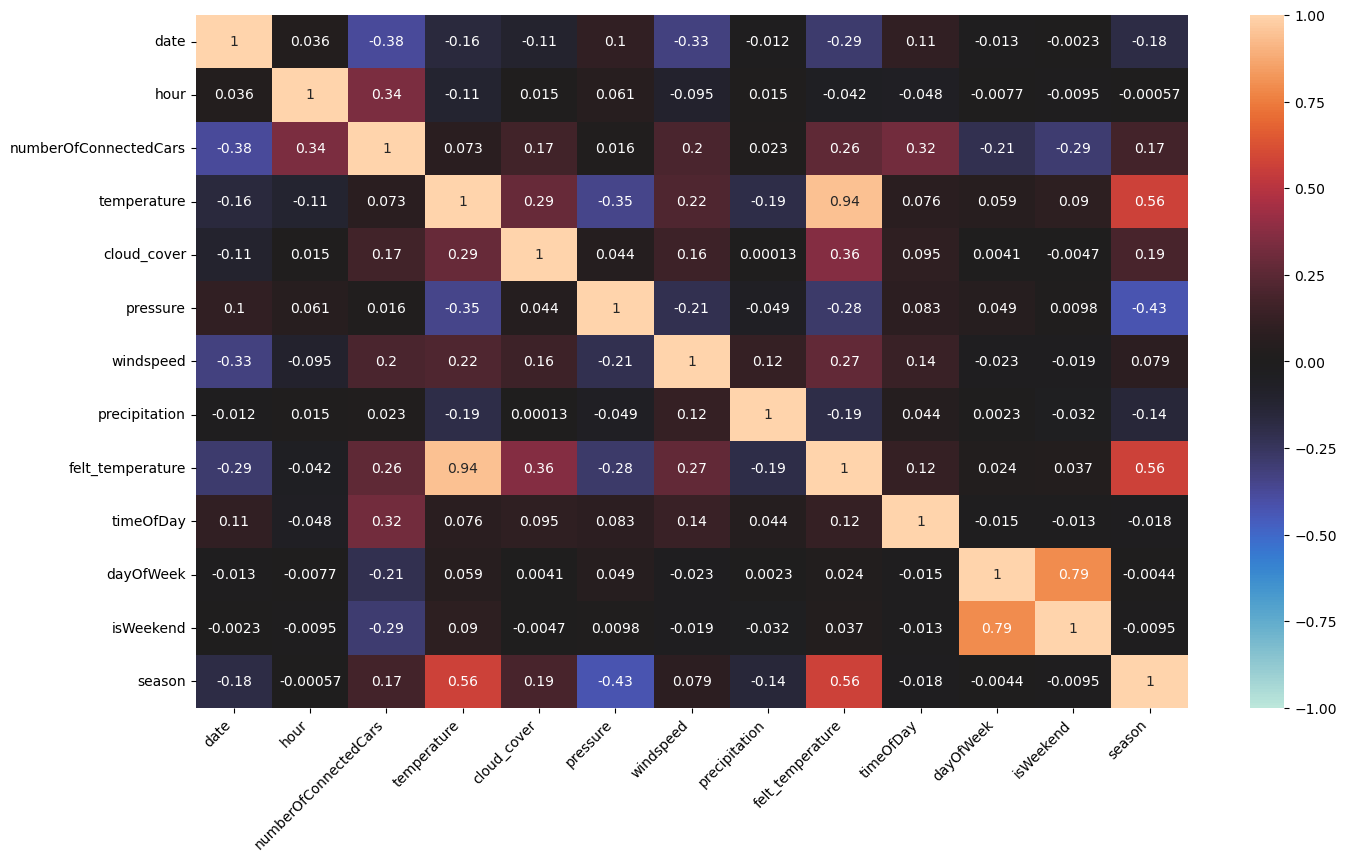

In [209]:
corrCars2 = dfPrediction1Site2.corr()
plt.figure(figsize = (16,9))
ax = sns.heatmap(corrCars2, vmin = -1, vmax= 1, center = 0, annot=True)

ax.set_xticklabels(ax.get_xticklabels(),
                  rotation = 45,
                  horizontalalignment = 'right')

ax.set_yticklabels(ax.get_yticklabels(),
                   rotation =0,
                   horizontalalignment = 'right')

plt.show()

As we can see, the features temperature and felt_temperature are highly correlated with each other, which is why we will eliminate the felt_temperature feature. Since we have not so much features, we will keep all of the other features for prediction.

In [210]:
#drop feature felt_temperature
dfPrediction1Site2 = dfPrediction1Site2.drop('felt_temperature', axis=1)
dfPrediction1Site2

,date,hour,numberOfConnectedCars,temperature,cloud_cover,pressure,windspeed,precipitation,timeOfDay,dayOfWeek,isWeekend,season
0,2018-04-25,11,1,12.0,26.0,989.11,11.0,0.0,1,2,0,2
1,2018-04-25,12,1,12.0,26.0,989.11,11.0,0.0,1,2,0,2
2,2018-04-25,13,3,12.0,26.0,989.44,11.0,0.0,2,2,0,2
3,2018-04-25,14,7,12.0,26.0,990.10,9.0,0.0,2,2,0,2
4,2018-04-25,15,22,12.6,26.0,990.10,9.0,0.0,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
16704,2020-12-31,1,1,19.0,34.0,992.41,9.0,0.0,5,3,0,1
16705,2020-12-31,2,1,19.0,34.0,992.41,9.0,0.0,5,3,0,1
16706,2020-12-31,16,2,6.0,34.0,987.14,0.0,0.0,3,3,0,1
16707,2020-12-31,17,3,9.5,34.0,987.14,19.0,0.0,3,3,0,1


**Visualisation of dependencied:**

In [211]:
# hour of connected cars 
df21 = dfPrediction1Site2[['hour', 'numberOfConnectedCars']].groupby('hour').mean()

#temperature
x22 = dfPrediction1Site2['temperature'].values

#min_temperature
df23 = dfPrediction1Site2[['cloud_cover', 'numberOfConnectedCars']].groupby('cloud_cover').mean()

#pressure
x24 = dfPrediction1Site2['pressure'].values

#windspeed
df25 = dfPrediction1Site2[['windspeed', 'numberOfConnectedCars']].groupby('windspeed').mean()

#precipitation
df26 = dfPrediction1Site2[['precipitation', 'numberOfConnectedCars']].groupby('precipitation').mean()

#timeOfDay
df27 = dfPrediction1Site2[['timeOfDay', 'numberOfConnectedCars']].groupby('timeOfDay').mean()

#day of Week
df28 = dfPrediction1Site2[['dayOfWeek', 'numberOfConnectedCars']].groupby('dayOfWeek').mean()

# is weekend
df29 = dfPrediction1Site2[['isWeekend', 'numberOfConnectedCars']].groupby('isWeekend').mean()

#season
df210 = dfPrediction1Site2[['season', 'numberOfConnectedCars']].groupby('season').mean()

yscatter = dfPrediction1Site2['numberOfConnectedCars'].values 

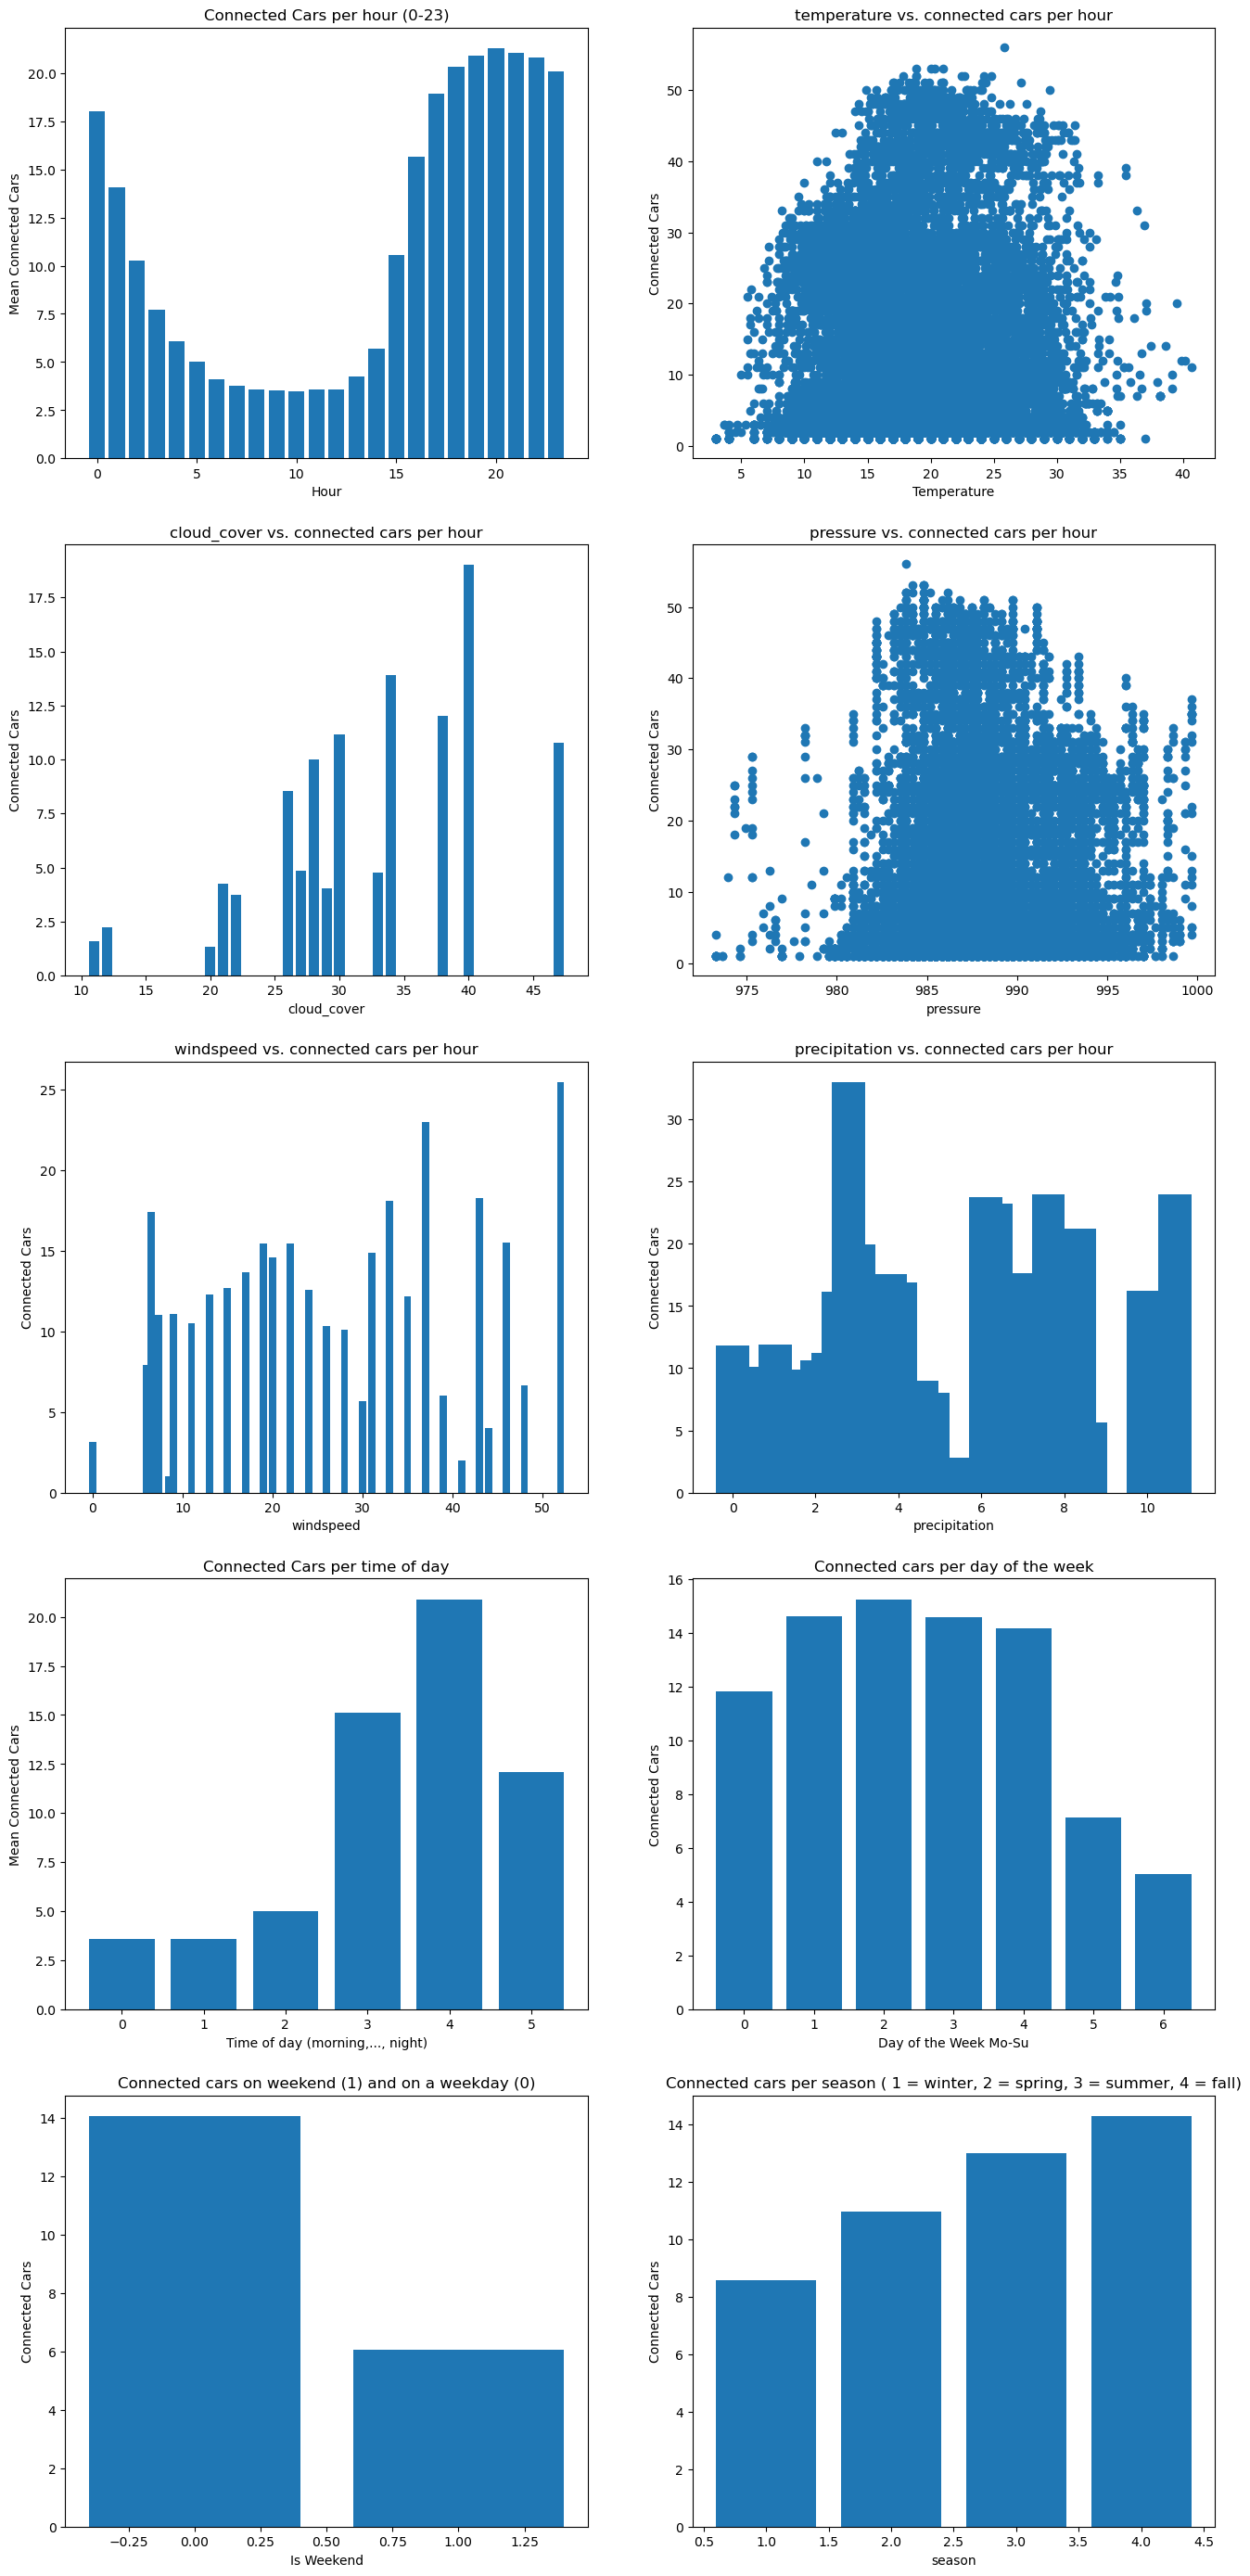

In [212]:
Fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 35))

# subplot no. 1
plt.subplot(5,2,1)
plt.xlabel("Hour")
plt.ylabel("Mean Connected Cars")
plt.title("Connected Cars per hour (0-23)")
plt.bar(df21.index, df21["numberOfConnectedCars"])

# subplot no. 2
plt.subplot(5,2,2) 
plt.xlabel("Temperature")
plt.ylabel("Connected Cars")
plt.title("temperature vs. connected cars per hour")
plt.scatter(x22, yscatter)

# subplot no. 3
plt.subplot(5,2,3) 
plt.xlabel("cloud_cover")
plt.ylabel("Connected Cars")
plt.title("cloud_cover vs. connected cars per hour")
plt.bar(df23.index, df23["numberOfConnectedCars"])

# subplot no. 4
plt.subplot(5,2,4)
plt.xlabel("pressure")
plt.ylabel("Connected Cars")
plt.title("pressure vs. connected cars per hour")
plt.scatter(x24, yscatter)

# subplot no. 5
plt.subplot(5,2,5)
plt.xlabel("windspeed")
plt.ylabel("Connected Cars")
plt.title("windspeed vs. connected cars per hour")
plt.bar(df25.index, df25["numberOfConnectedCars"])

# subplot no. 6
plt.subplot(5,2,6)
plt.xlabel("precipitation")
plt.ylabel("Connected Cars")
plt.title("precipitation vs. connected cars per hour")
plt.bar(df26.index, df26["numberOfConnectedCars"])

# subplot no. 7
plt.subplot(5,2,7)
plt.xlabel("Time of day (morning,..., night)")
plt.ylabel("Mean Connected Cars")
plt.title("Connected Cars per time of day")
plt.bar(df27.index, df27["numberOfConnectedCars"])

# subplot no. 8
plt.subplot(5,2,8) 
plt.xlabel("Day of the Week Mo-Su")
plt.ylabel("Connected Cars")
plt.title("Connected cars per day of the week")
plt.bar(df28.index, df28["numberOfConnectedCars"])

# subplot no. 6
plt.subplot(5,2,9) 
plt.xlabel("Is Weekend")
plt.ylabel("Connected Cars")
plt.title("Connected cars on weekend (1) and on a weekday (0)")
plt.bar(df29.index, df29["numberOfConnectedCars"])

# subplot no. 7
plt.subplot(5,2,10)
plt.xlabel("season")
plt.ylabel("Connected Cars")
plt.title("Connected cars per season ( 1 = winter, 2 = spring, 3 = summer, 4 = fall)")
plt.bar(df210.index, df210["numberOfConnectedCars"])

plt.show()

## Creation of Prediction Model  

y = numberOfConnectedCars  
xp = hour, temperature, cloud_cover, pressure, windspeed, precipitation, timeOfDay, dayOfWeek, isWeekend, season

###  Prediction for site 1  

In [213]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%matplotlib inline

**Normalize input values:**

In [214]:
#set output frame and input frame
x_Site1 = dfPrediction1Site1[['hour', 'temperature','cloud_cover', 'pressure', 'windspeed', 'precipitation', 'timeOfDay', 'dayOfWeek', 'isWeekend', 'season']]
y_Site1 = dfPrediction1Site1['numberOfConnectedCars']

In [215]:
# Normalize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_norm_Site1 = scaler.fit_transform(x_Site1)

**Split the dataset in trainset, validationset and testset (50-20-30):**

In [216]:
#split the data set in 70% training set and 30% testing set
x_train_Site1, x_test_Site1, y_train_Site1, y_test_Site1 = train_test_split(x_norm_Site1, y_Site1, test_size=0.3,random_state=42)

# save the combination of training and validation set in extra variables
x_train_val_Site1 = x_train_Site1
y_train_val_Site1 = y_train_Site1

#split the training data set in 70% training set and 20% validation set to achieve a 50-20-30 split
x_train_Site1, x_val_Site1, y_train_Site1, y_val_Site1 = train_test_split(x_train_Site1, y_train_Site1, test_size=(0.2/0.7), random_state = 42)

**We now have the following datasets:**
- x_train, y_train &rarr; 50% input features for training the model
- x_val, y_val &rarr; 20% to select hyperparameters
- x_test, y_test &rarr; 30% to control the accurancy of the model

**Typical steps of a regression:**
1. Divide data into training set, holdout set, and test set
2. Train algorithm on training set (i.e., to learn parameters), use holdout set to select hyperparameters
4. (Optional) retrain system on training + holdout
5. Evaluate performance on test set

#### `Lasso Regression`

Procedure to choose optimal alpha and optimal polynomial degree:
- loop over degrees of 1 to 6
- calculate for every degree the best alpha for the Lasso Regression
- test performance
- choose the degree with the corresponding best alpha to perform the Lasso Regression 

**Loop over the polynomial degrees:**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [ ]:
mae_test_lasso_Site1 = []
rmse_test_lasso_Site1 = []
alphas_test_lasso_Site1 = []

for i in range(1,7):
    # initialize model for polynomial features
    Poly_lasso_Site1 = PolynomialFeatures(degree = i)

    # fit and transform x
    x_train_poly_Site1 = Poly_lasso_Site1.fit_transform(x_train_val_Site1) #eventuell reshapen siehe vl
    x_test_poly_Site1 = Poly_lasso_Site1.fit_transform(x_test_Site1) #eventuell reshapen siehe vl
    
    #find out the best alpha for Lasso regression
    reg_lasso_Site1 = LassoCV(cv=5, random_state=0)
    reg_lasso_Site1.fit(x_train_poly_Site1, y_train_val_Site1)
    best_alpha_l1_Site1 = reg_lasso_Site1.alpha_
    alphas_test_lasso_Site1.append(best_alpha_l1_Site1)
    
    #run regression with best calculated alpha
    model_l1_Site1 = Lasso(reg_lasso_Site1.alpha_)

    model_l1_Site1.fit(x_train_poly_Site1, y_train_val_Site1)
    predict_l1_Site1 = model_l1_Site1.predict(x_test_poly_Site1)

    #save the MAE and RMSE
    mae_test_lasso_Site1.append(mean_absolute_error(y_test_Site1, predict_l1_Site1))
    rmse_test_lasso_Site1.append(mean_squared_error(y_test_Site1, predict_l1_Site1)**0.5)

In [ ]:
#plotting the MAE and RMSE for different degrees
plt.plot(mae_test_lasso_Site1, label = "MAE test set")
plt.plot(rmse_test_lasso_Site1, label = "RMSE test set")
plt.xlabel('degree')
plt.ylabel("Error")
plt.xlim(0,5)
plt.title("Evaluate the lasso regression for different polynomial degrees")
plt.grid()

In [ ]:
#show best alphas of the regressions with the different degrees
alphas_test_lasso_Site1 

In [ ]:
#show mae and rmse for all degrees
print(mae_test_lasso)
print(rmse_test_lasso)

In [ ]:
...

### `Random Forest Regression`

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

**Finding the best parameters:**

In [222]:
rf_site1 = RandomForestRegressor(random_state =42)
rf_param_site1 = {'n_estimators': np.arange(25,150,25), 'max_depth': np.arange(1,11,2), 'min_samples_leaf':np.arange(2,15,3)}

gs_rf_site1 = GridSearchCV(rf_site1, rf_param_site1, cv=3)
gs_rf_site1.fit(x_train_val_Site1, y_train_val_Site1)
best_params_site1 = gs_rf_site1.best_params_

**Train the model:**

In [225]:
# Fit regression model
rf_2_site1 = RandomForestRegressor(n_estimators = best_params_site1['n_estimators'], max_depth = best_params_site1['max_depth'], min_samples_leaf = best_params_site1['min_samples_leaf'], random_state=0)
model_rf_site1 = rf_2_site1.fit(x_train_val_Site1, y_train_val_Site1)

**Evaluate the performance of the model:**

In [226]:
# Predict
y_predict_rf_site1 = model_rf_site1.predict(x_test_Site1)

#Test set performance
mae_rf_site1 = mean_absolute_error(y_test_Site1, y_predict_rf_site1)
mse_rf_site1 = mean_squared_error(y_test_Site1, y_predict_rf_site1)**(0.5)

print('Test set performance:')
print('MAE: ', mae_rf_site1)
print('RMSE: ', mse_rf_site1)
print("Accuracy:", round((1-(mae_rf_site1/dfPrediction1Site1["numberOfConnectedCars"].mean()))*100,2), "%")

Test set performance:
MAE:  6.980536782363362
RMSE:  10.885612332073409
Accuracy: 62.54 %


### `Artificial Neural Network`  